# Intermediate Data Analysis

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams.update({"font.size": 18})

# Utils

In [3]:
def build_dict_from_folder(folder_path):
    datasets_dict = {}
    for folder in os.listdir(folder_path):
        if os.path.isdir(os.path.join(folder_path, folder)):
            datasets_dict[folder] = {}
            for file in os.listdir(os.path.join(folder_path, folder)):
                feature_name = file.split(".")[0]
                datasets_dict[folder][feature_name] = pd.read_excel(
                    os.path.join(folder_path, folder, file)
                )
    return datasets_dict

# Load Data

In [4]:
data_folder = os.path.join("..", "data")

intermediate_data_folder = os.path.join(data_folder, "intermediate_data")

In [5]:
datasets_dict = build_dict_from_folder(intermediate_data_folder)

In [6]:
datasets_dict.keys()

dict_keys(['GUIAMETS', 'MEQUINENZA', 'XERTA', 'TORTOSA'])

In [7]:
tortosa_dfs = datasets_dict["TORTOSA"]
guiamets_dfs = datasets_dict["GUIAMETS"]
mequinenza_dfs = datasets_dict["MEQUINENZA"]
xerta_dfs = datasets_dict["XERTA"]

# Tortosa

In [8]:
for feature, df in tortosa_dfs.items():
    print(feature)
    print()
    print(df.isna().sum())
    print()
    print("Min date:", df["DateTime"].min())
    print()
    print("Max date:", df["DateTime"].max())
    print()
    print("-" * 100)

cumulated_rainfall_24h

DateTime    0
Average     0
dtype: int64

Min date: 2004-07-04 00:00:00

Max date: 2023-09-30 00:00:00

----------------------------------------------------------------------------------------------------
turbidity

DateTime    0
Average     0
Minimum     0
Maximum     0
Nºdat       0
NºOK        0
dtype: int64

Min date: 2012-08-13 00:00:00

Max date: 2023-10-16 00:00:00

----------------------------------------------------------------------------------------------------
watertemperature

DateTime    0
Average     0
Minimum     0
Maximum     0
Nºdat       0
NºOK        0
dtype: int64

Min date: 2012-08-29 00:00:00

Max date: 2023-10-16 00:00:00

----------------------------------------------------------------------------------------------------
conductivity

DateTime    0
Average     0
Minimum     0
Maximum     0
Nºdat       0
NºOK        0
dtype: int64

Min date: 2012-08-13 00:00:00

Max date: 2023-10-16 00:00:00

----------------------------------------------

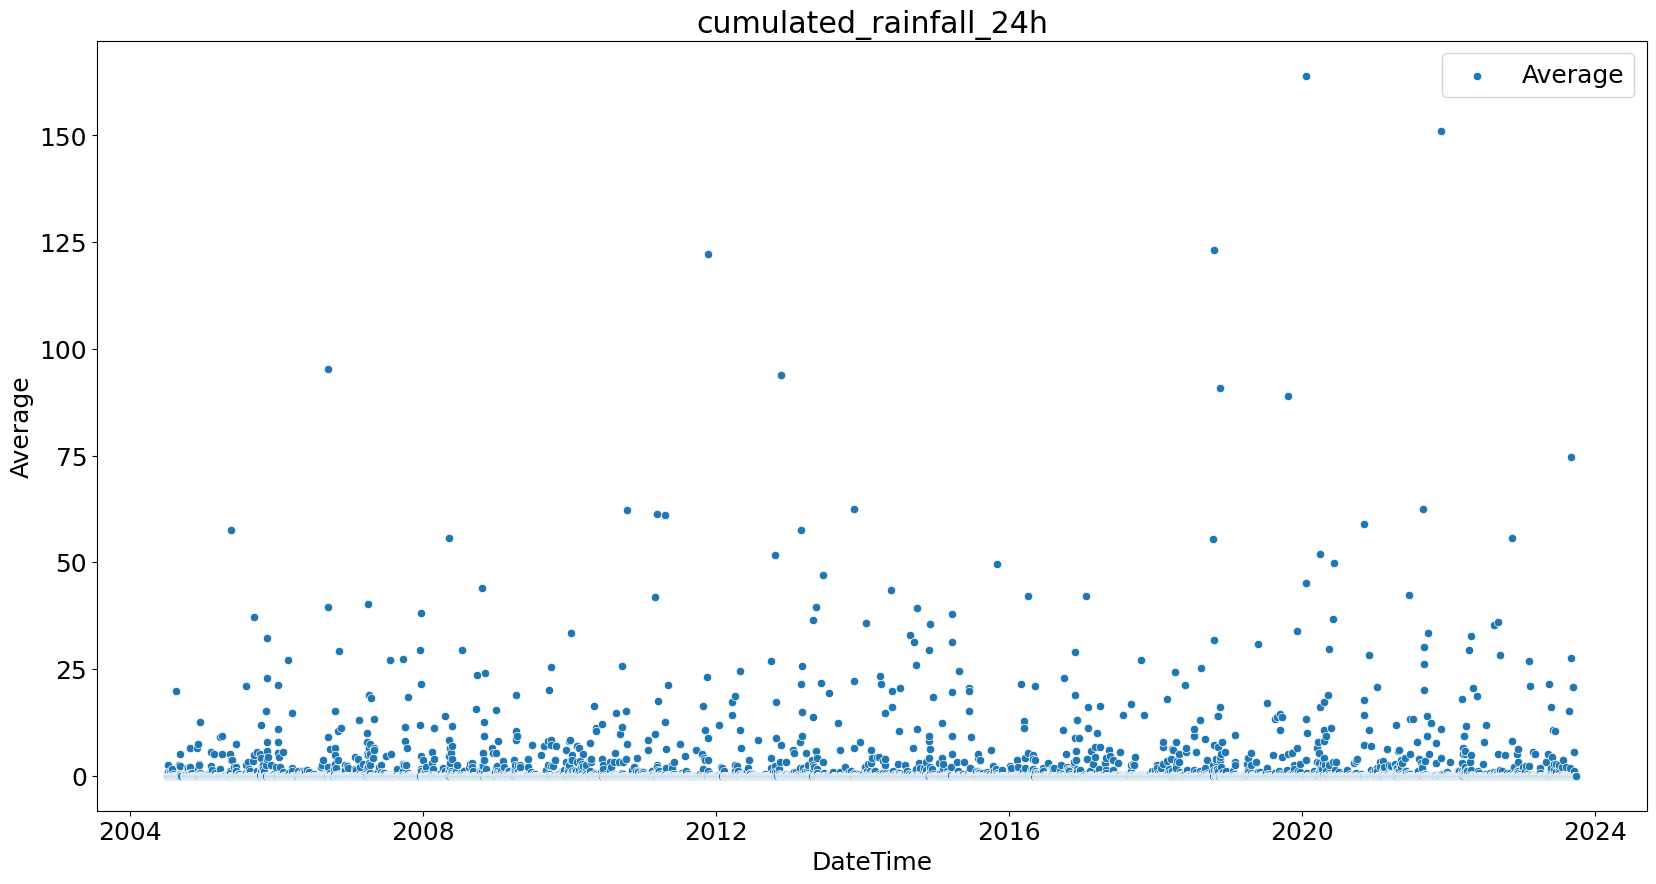

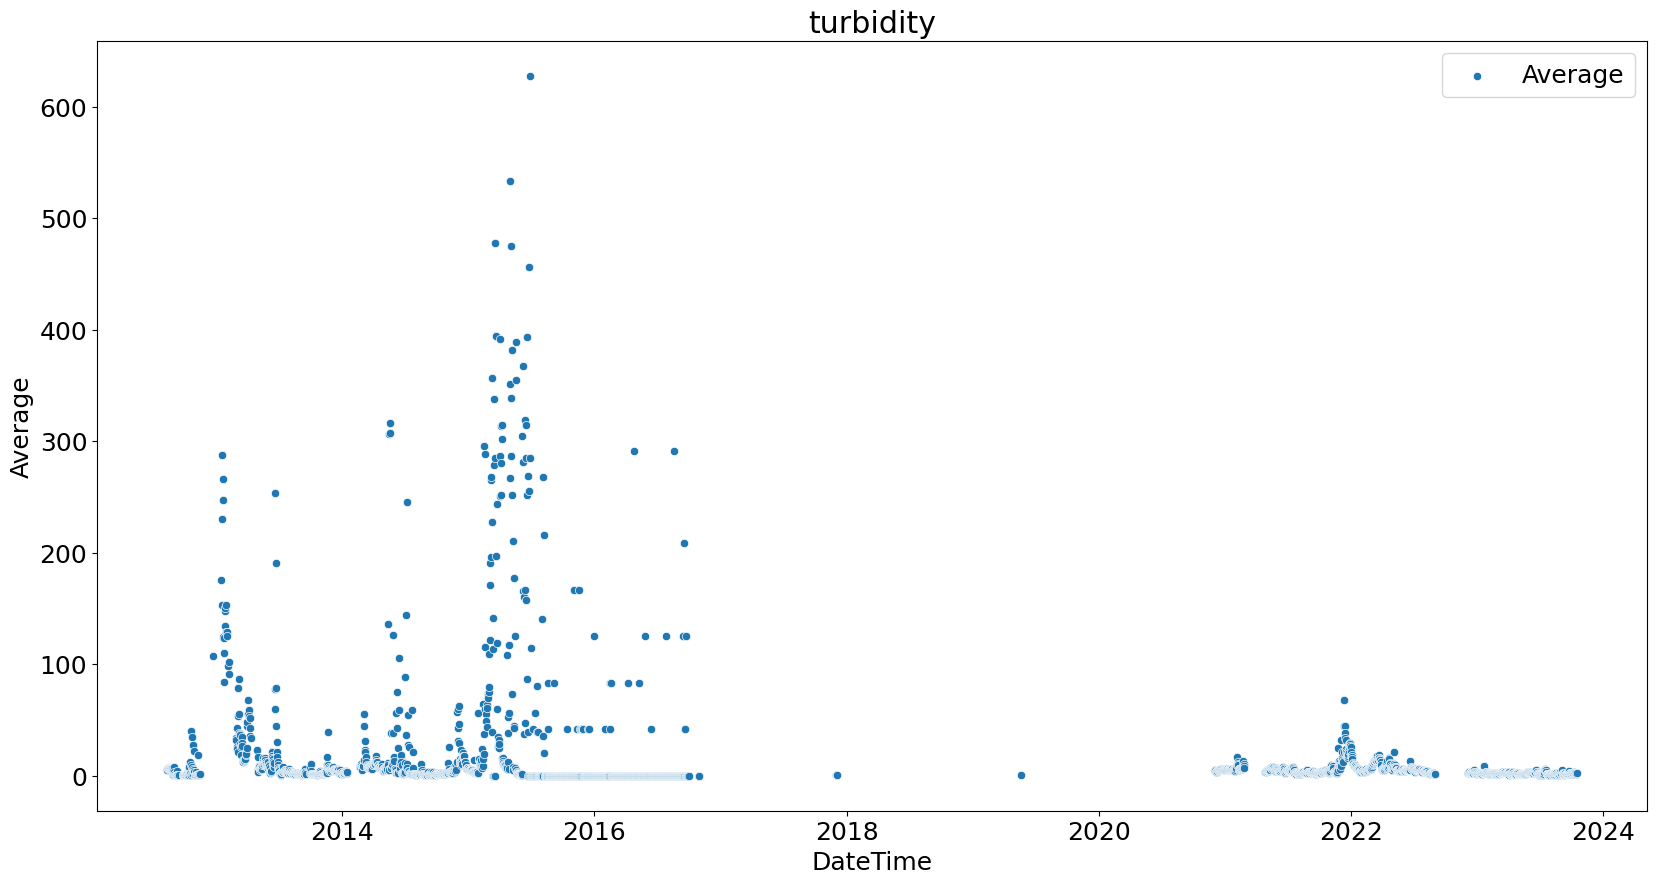

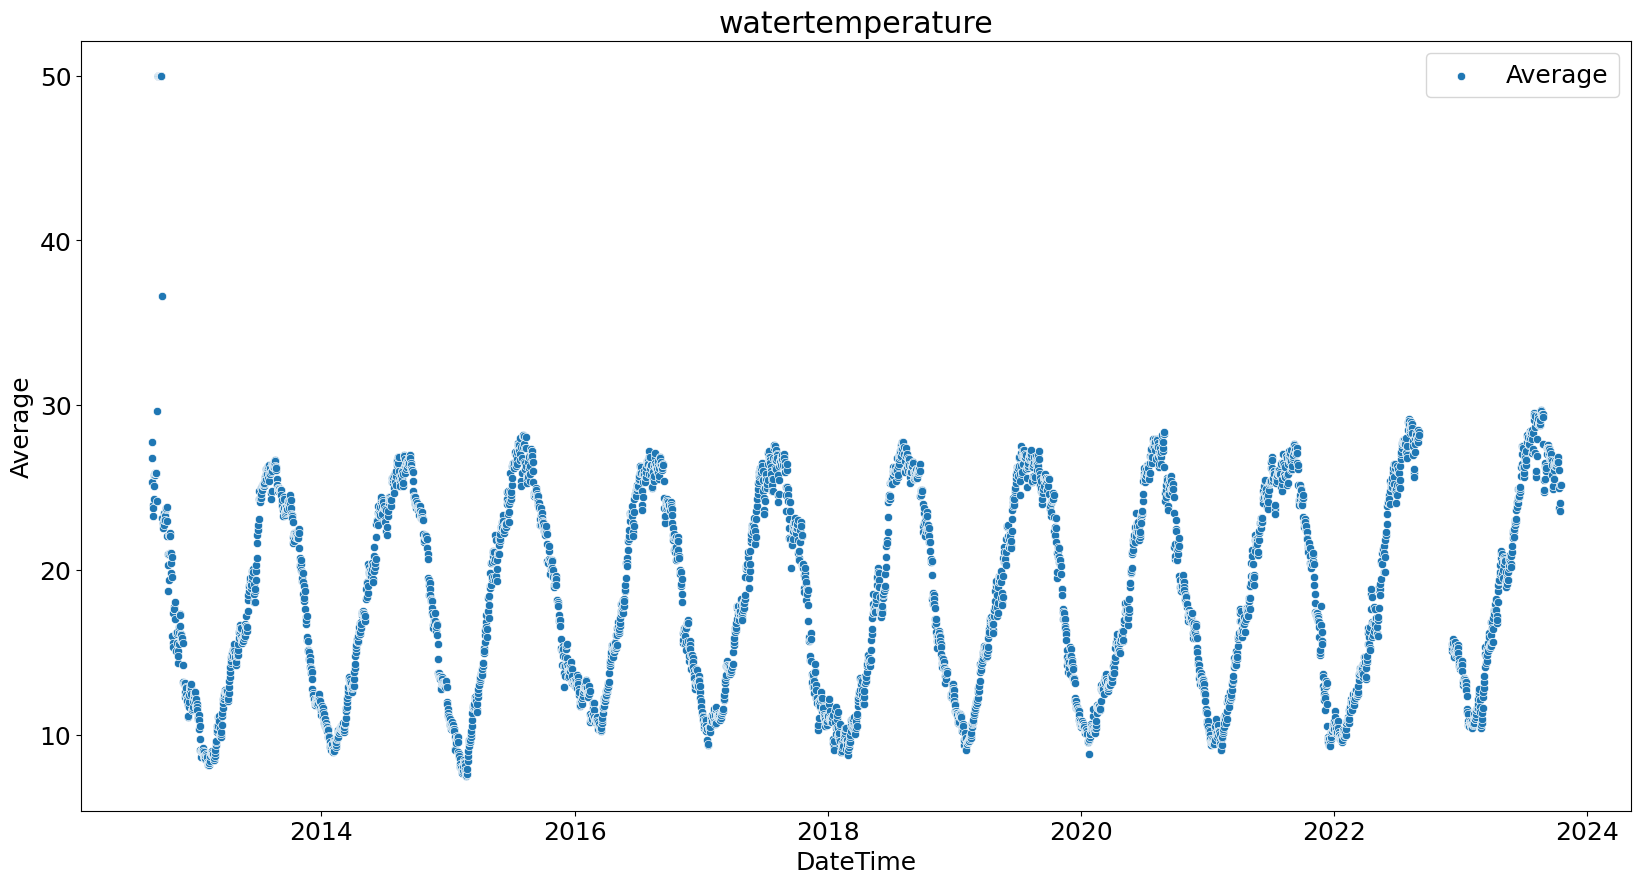

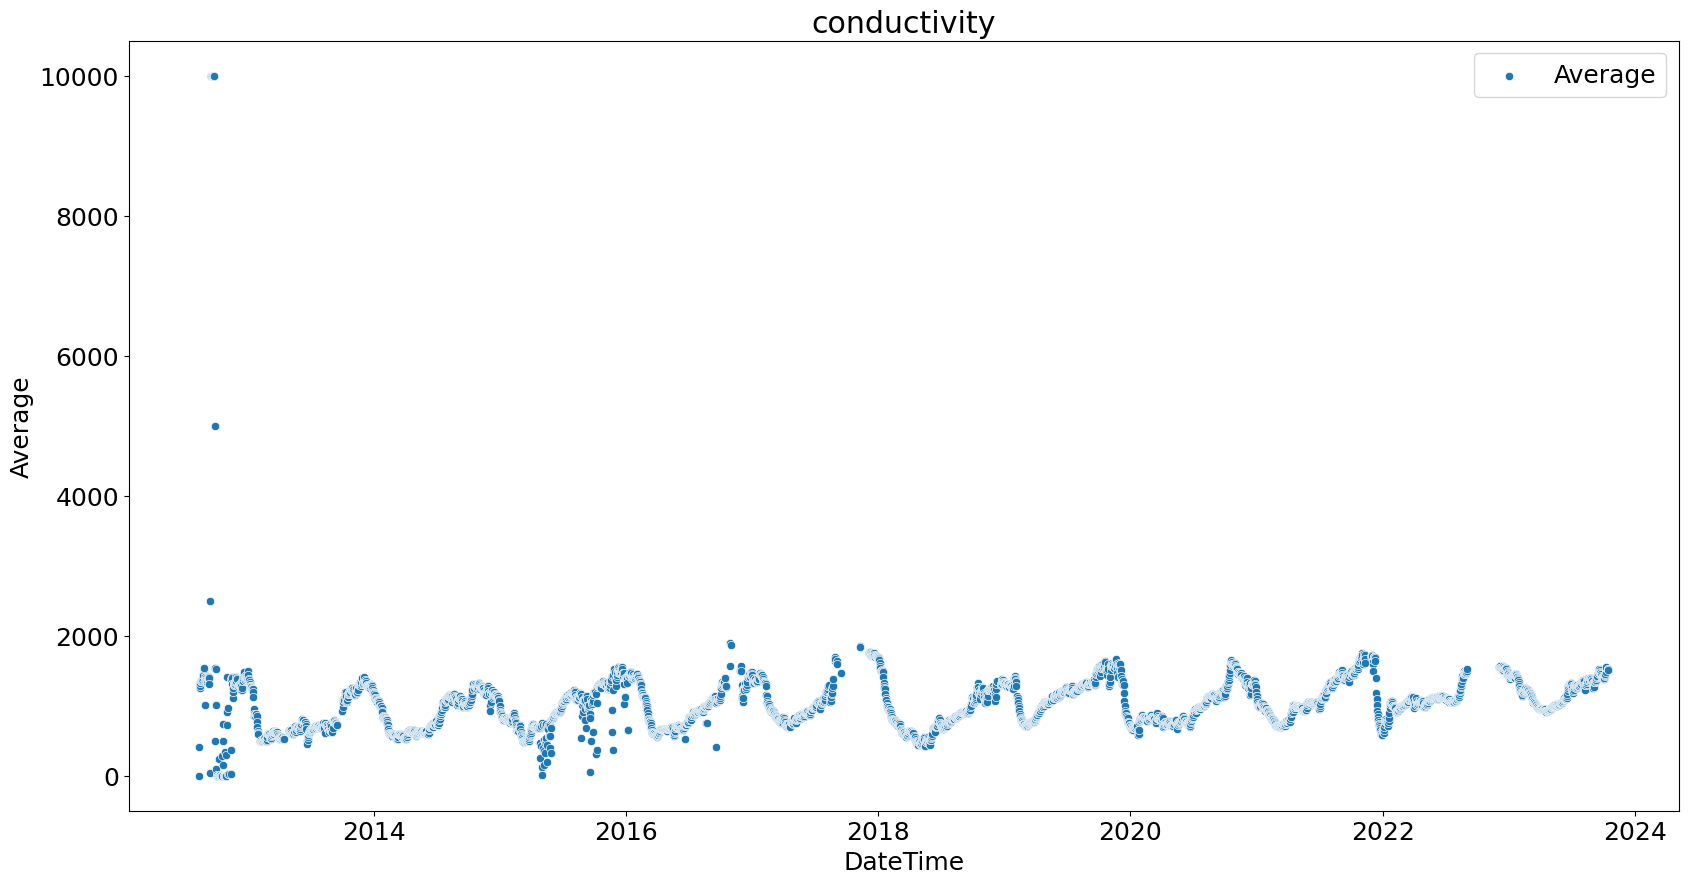

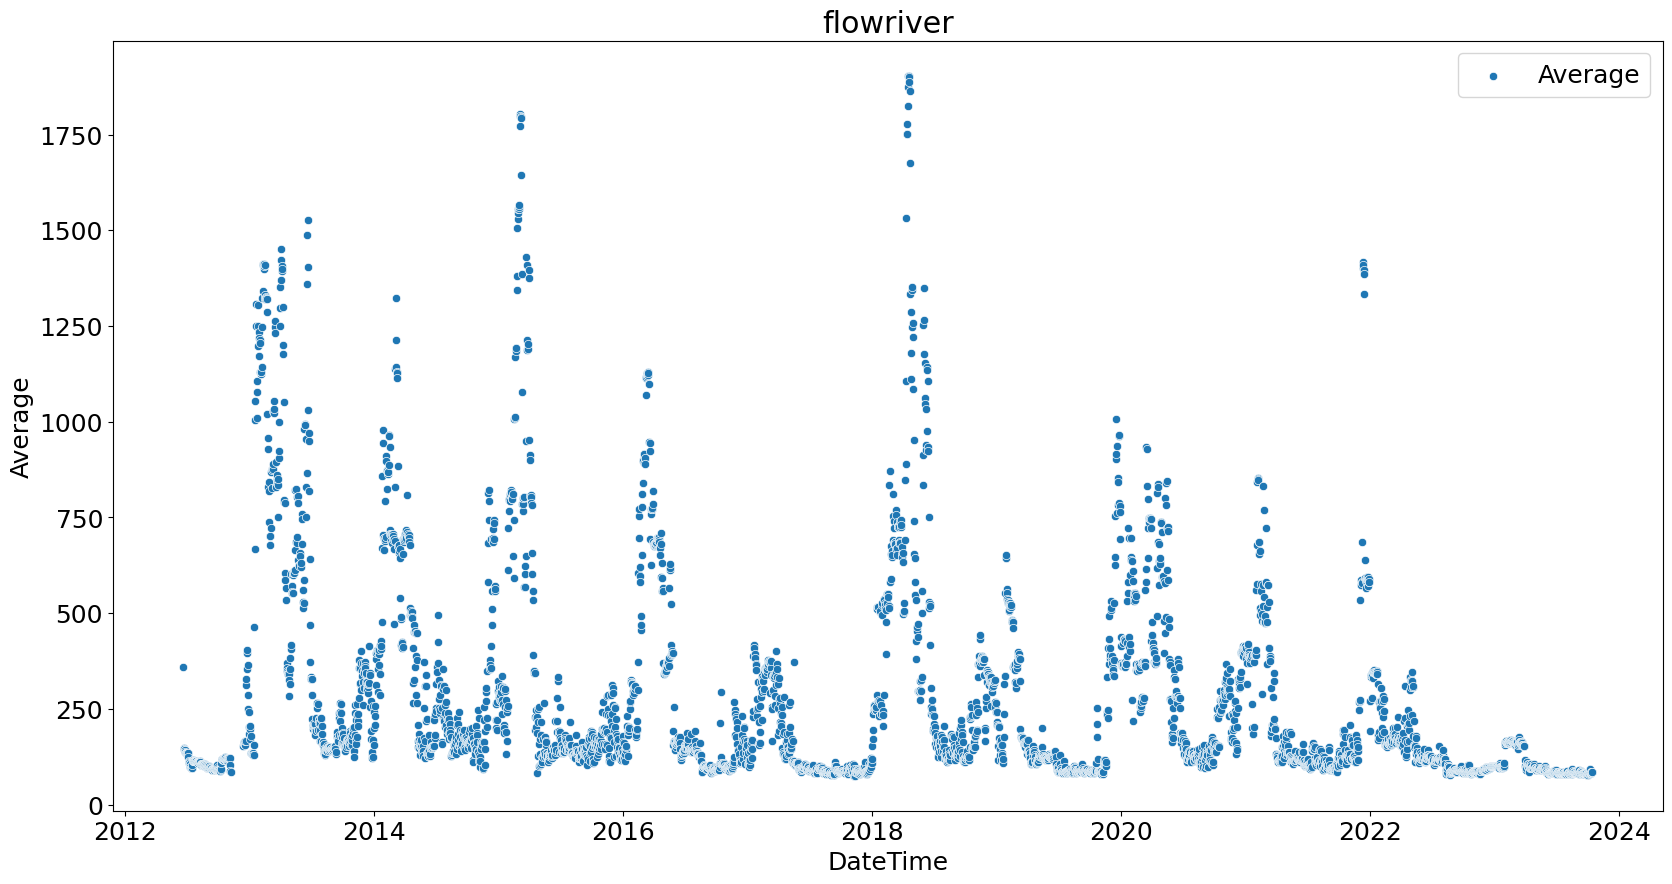

In [9]:
for feature, df in tortosa_dfs.items():
    plt.figure(figsize=(20, 10))
    sns.scatterplot(data=df, x="DateTime", y="Average", label="Average")
    # if 'Maximum' in df.columns:
    #     sns.lineplot(data=df, x='DateTime', y='Maximum', label='Maximum')
    # if 'Minimum' in df.columns:
    #     sns.lineplot(data=df, x='DateTime', y='Minimum', label='Minimum')
    plt.title(feature)
    plt.legend()
    plt.show()

In [10]:
# %%script false --no-raise-error
feature, tortosa_df = list(tortosa_dfs.items())[0]

tortosa_df = tortosa_df[["DateTime", "Average"]]

tortosa_df.rename(columns={"Average": feature}, inplace=True)

for feature, df in list(tortosa_dfs.items())[1:]:
    df = df[["DateTime", "Average"]]
    df.rename(columns={"Average": feature}, inplace=True)
    tortosa_df = tortosa_df.merge(df, on="DateTime", how="inner")

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_19158/3036930427.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Average': feature}, inplace=True)
/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_19158/3036930427.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Average': feature}, inplace=True)
/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_19158/3036930427.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [11]:
tortosa_df

DateTime  cumulated_rainfall_24h  turbidity  watertemperature  \
0    2012-08-29                     0.0       4.42             27.75   
1    2012-08-30                     0.4       0.99             26.78   
2    2012-08-31                     0.0       1.08             25.35   
3    2012-09-01                     0.0       7.96             23.93   
4    2012-09-02                     0.0       2.92             23.30   
...         ...                     ...        ...               ...   
2173 2023-09-26                     0.0       1.86             25.51   
2174 2023-09-27                     0.0       2.77             26.05   
2175 2023-09-28                     0.0       2.07             26.35   
2176 2023-09-29                     0.0       1.59             26.54   
2177 2023-09-30                     0.0       2.02             26.60   

      conductivity  flowriver  
0          1412.61     100.82  
1          1003.79      97.40  
2          1371.54      95.59  
3          1390.08      94.97  
4          1394.38      95.48  
...            ...        ...  
2173       1424.07      83.50  
2174       1403.93      81.17  
2175       1390.99      81.42  
2176       1392.94      80.71  
2177       1412.60      81.00  

[2178 rows x 6 columns]

<Figure size 5000x3000 with 0 Axes>

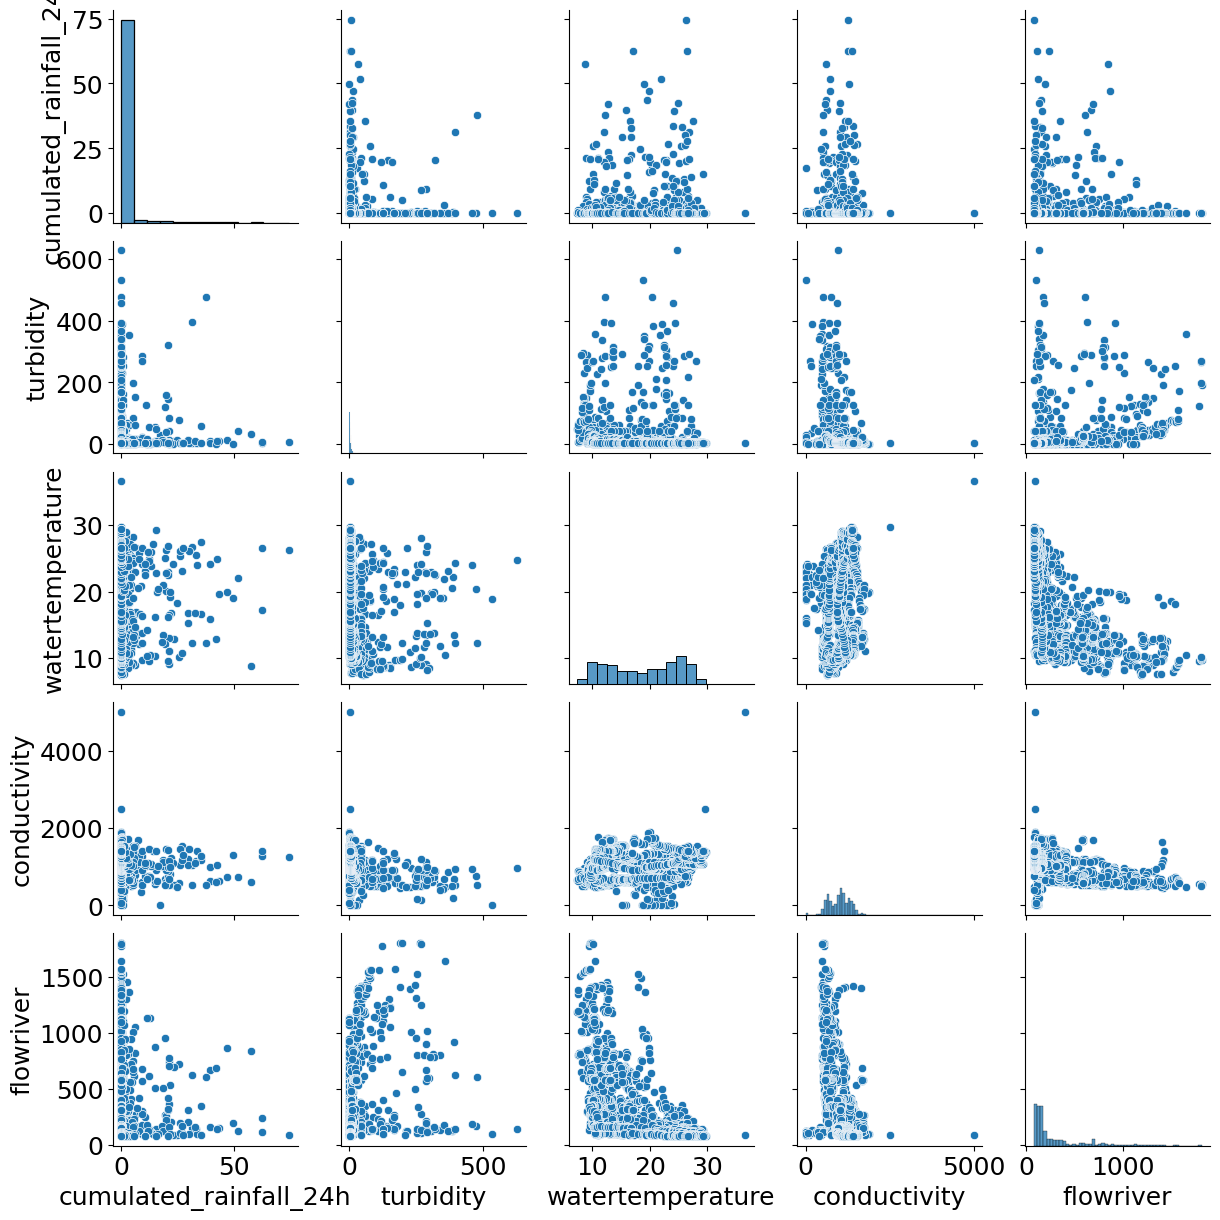

In [12]:
plt.figure(figsize=(50, 30))
sns.pairplot(tortosa_df)
plt.show()

# Guiamets

In [13]:
for feature, df in guiamets_dfs.items():
    print(feature)
    print()
    print(df.isna().sum())
    print()
    print("Min date:", df["DateTime"].min())
    print()
    print("Max date:", df["DateTime"].max())
    print()
    print("-" * 100)

cumulated_rainfall_24h

Average     0
DateTime    0
dtype: int64

Min date: 2008-09-11 00:00:00

Max date: 2023-09-30 00:00:00

----------------------------------------------------------------------------------------------------
environmental_temperature

Maximum     0
Minimum     0
Average     0
DateTime    0
dtype: int64

Min date: 2008-09-11 00:00:00

Max date: 2023-09-30 00:00:00

----------------------------------------------------------------------------------------------------


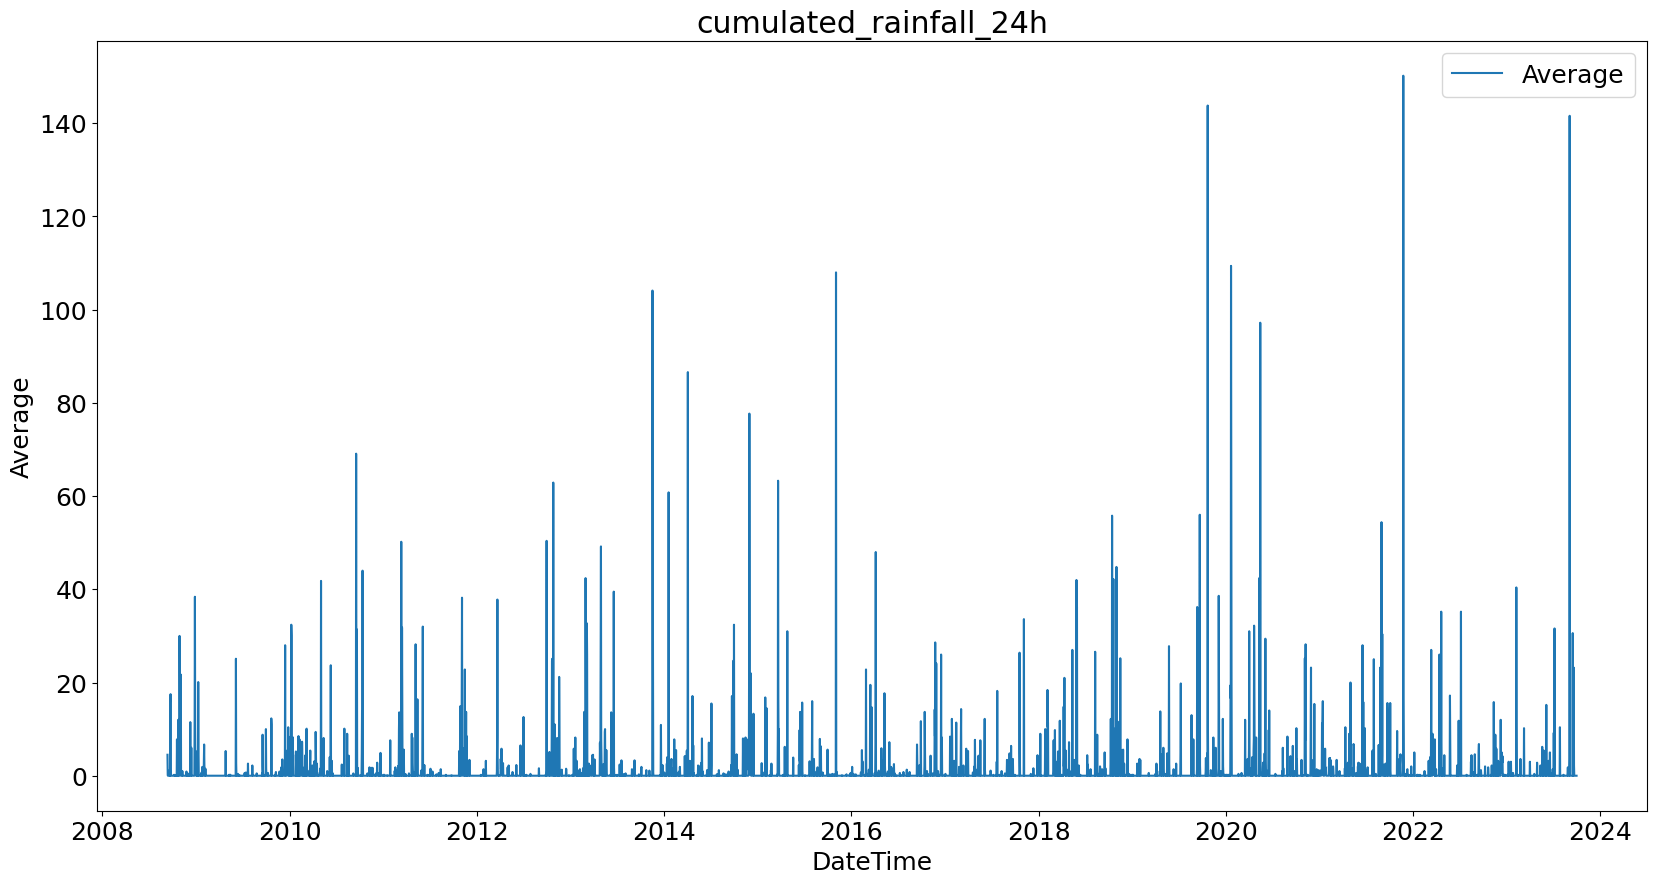

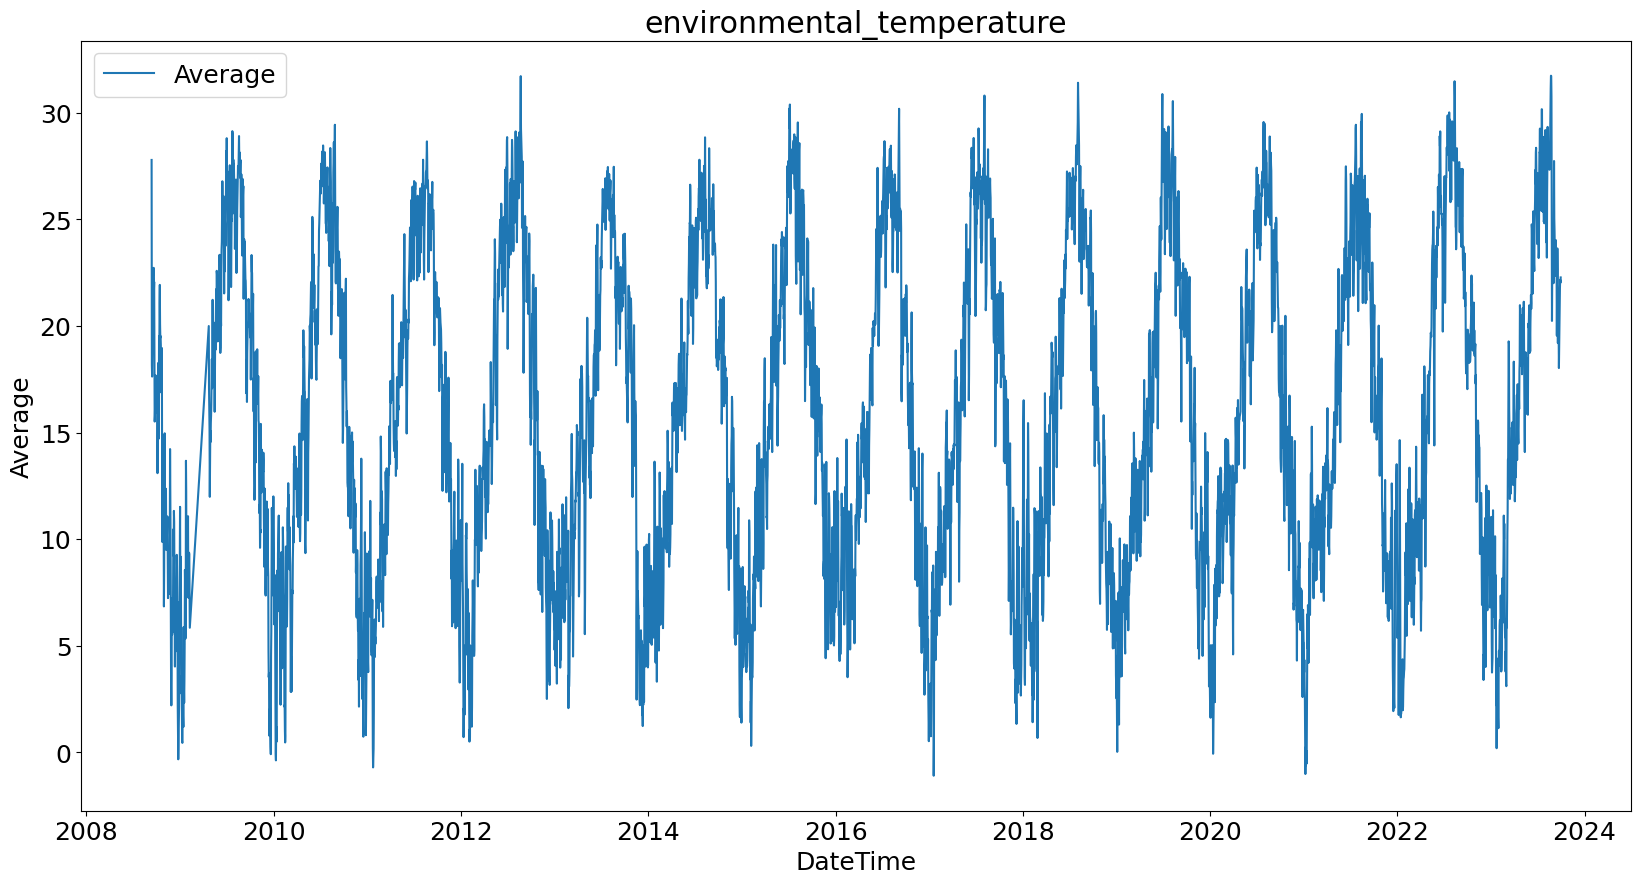

In [14]:
for feature, df in guiamets_dfs.items():
    plt.figure(figsize=(20, 10))
    sns.lineplot(data=df, x="DateTime", y="Average", label="Average")
    # if 'Maximum' in df.columns:
    #     sns.lineplot(data=df, x='DateTime', y='Maximum', label='Maximum')
    # if 'Minimum' in df.columns:
    #     sns.lineplot(data=df, x='DateTime', y='Minimum', label='Minimum')
    plt.title(feature)
    plt.legend()
    plt.show()

# Mequinenza

In [15]:
for feature, df in mequinenza_dfs.items():
    print(feature)
    print()
    print(df.isna().sum())
    print()
    print("Min date:", df["DateTime"].min())
    print()
    print("Max date:", df["DateTime"].max())
    print()
    print("-" * 100)

cumulated_rainfall_24h

Average     0
DateTime    0
dtype: int64

Min date: 1997-10-30 00:00:00

Max date: 2023-09-30 00:00:00

----------------------------------------------------------------------------------------------------


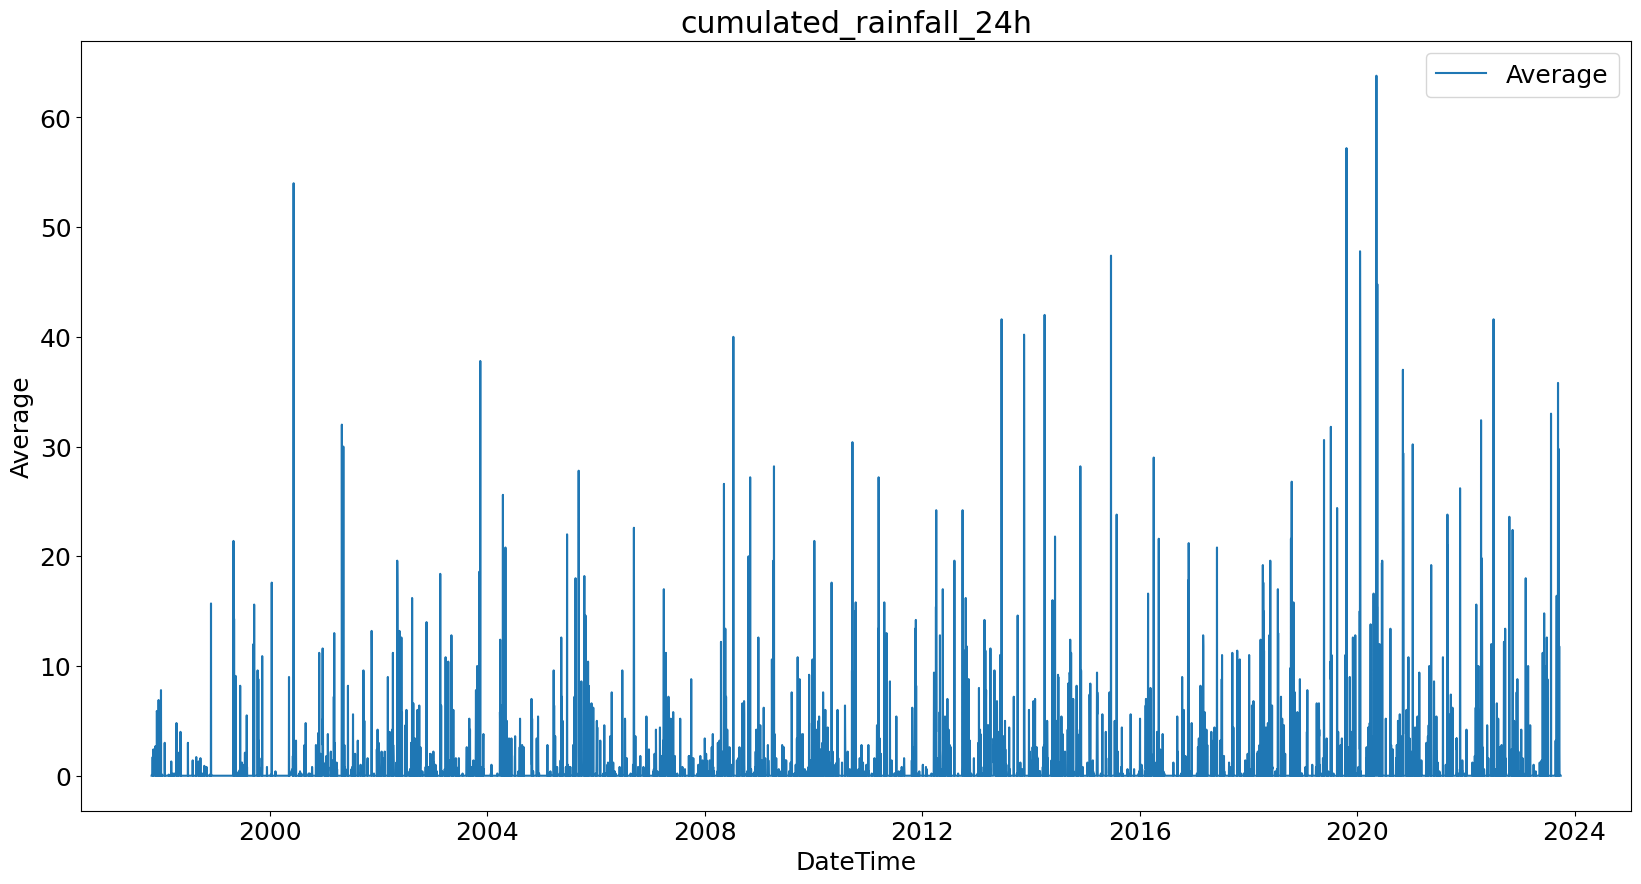

In [16]:
for feature, df in mequinenza_dfs.items():
    plt.figure(figsize=(20, 10))
    sns.lineplot(data=df, x="DateTime", y="Average", label="Average")
    # if 'Maximum' in df.columns:
    #     sns.lineplot(data=df, x='DateTime', y='Maximum', label='Maximum')
    # if 'Minimum' in df.columns:
    #     sns.lineplot(data=df, x='DateTime', y='Minimum', label='Minimum')
    plt.title(feature)
    plt.legend()
    plt.show()

# Xerta

In [17]:
for feature, df in xerta_dfs.items():
    print(feature)
    print()
    print(df.isna().sum())
    print()
    print("Min date:", df["DateTime"].min())
    print()
    print("Max date:", df["DateTime"].max())
    print()
    print("-" * 100)

nitrate

DateTime    0
Average     0
Minimum     0
Maximum     0
Nºdat       0
NºOK        0
dtype: int64

Min date: 2012-03-06 00:00:00

Max date: 2023-10-01 00:00:00

----------------------------------------------------------------------------------------------------
pH

DateTime    0
Average     0
Minimum     0
Maximum     0
Nºdat       0
NºOK        0
dtype: int64

Min date: 1997-03-12 00:00:00

Max date: 2023-10-01 00:00:00

----------------------------------------------------------------------------------------------------
turbidity

DateTime    0
Average     0
Minimum     0
Maximum     0
Nºdat       0
NºOK        0
dtype: int64

Min date: 1997-01-10 00:00:00

Max date: 2023-10-01 00:00:00

----------------------------------------------------------------------------------------------------
Ammonium

DateTime    0
Average     0
Minimum     0
Maximum     0
Nºdat       0
NºOK        0
dtype: int64

Min date: 1997-01-10 00:00:00

Max date: 2023-10-01 00:00:00

-----------------------

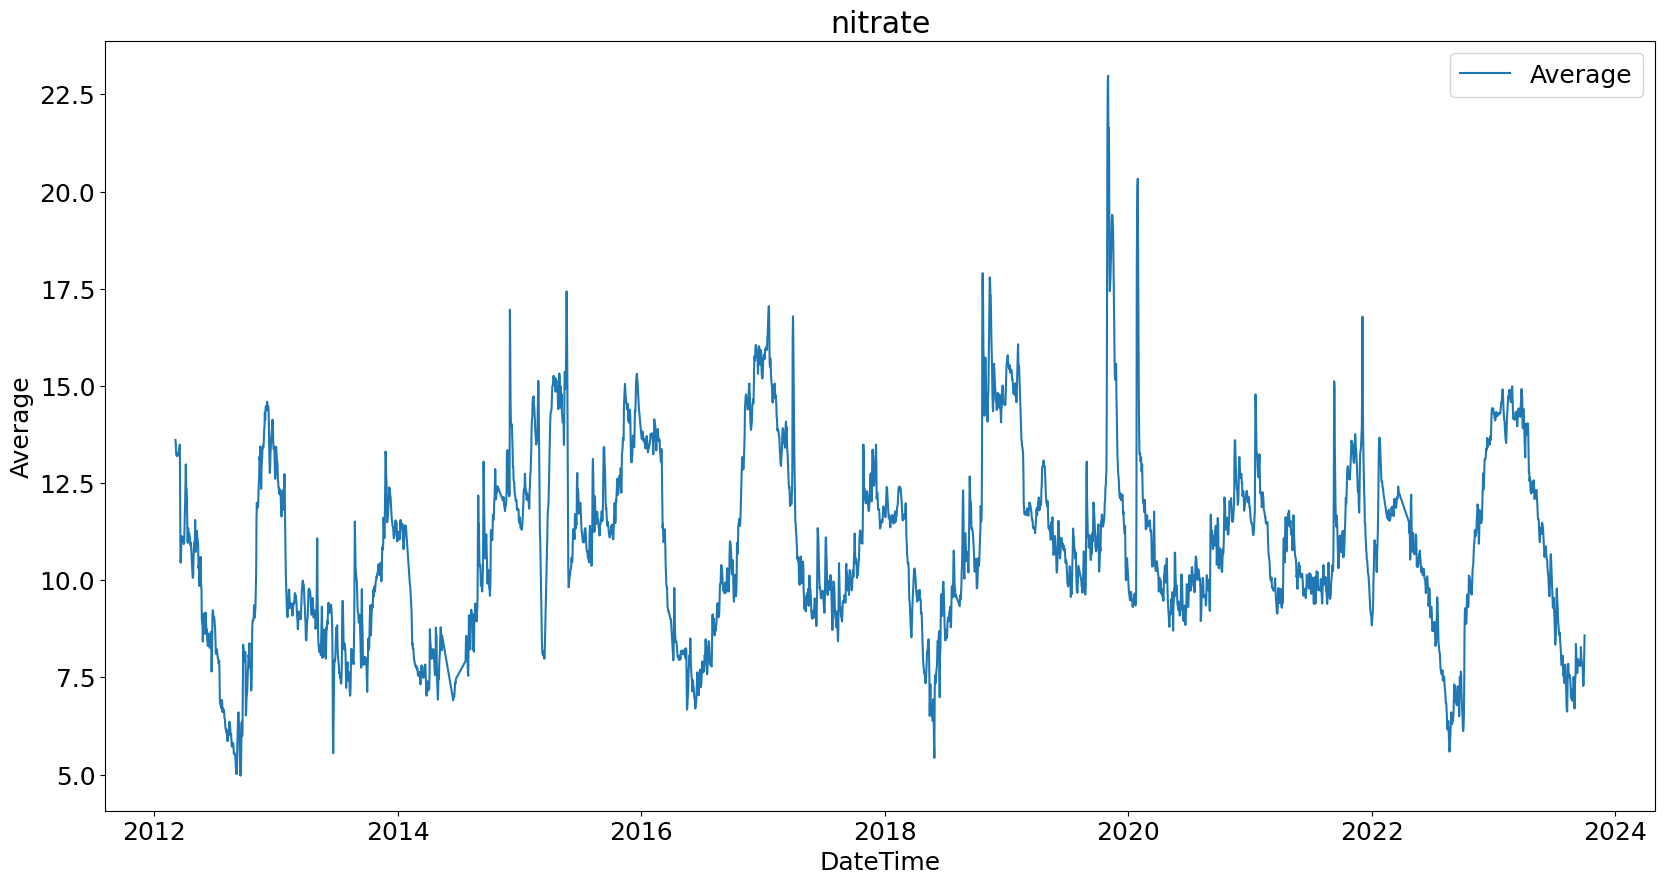

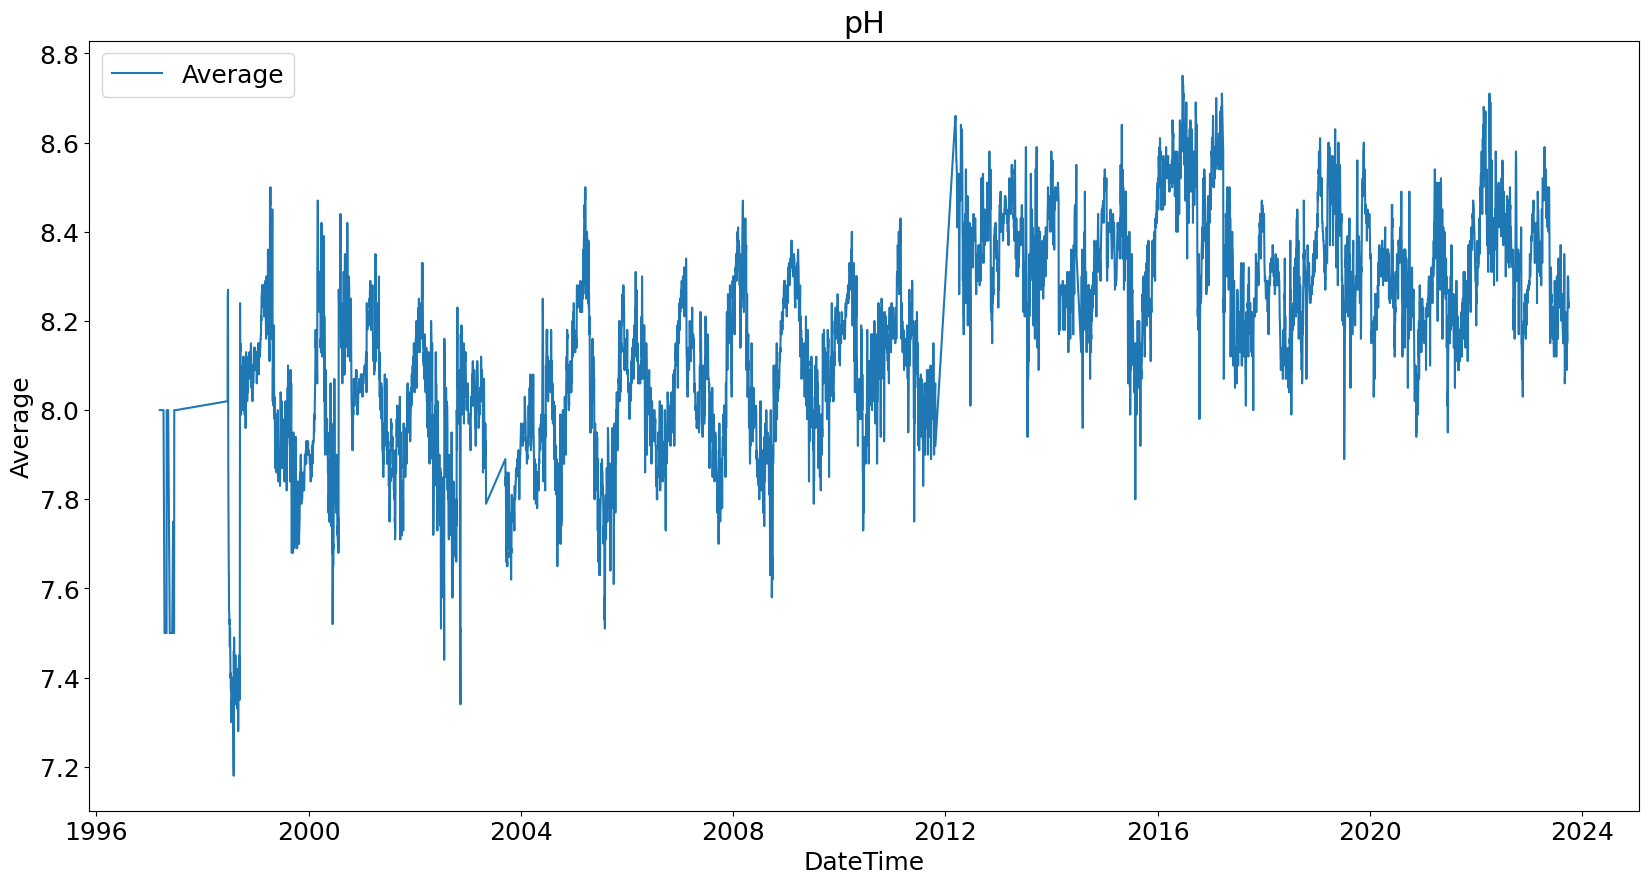

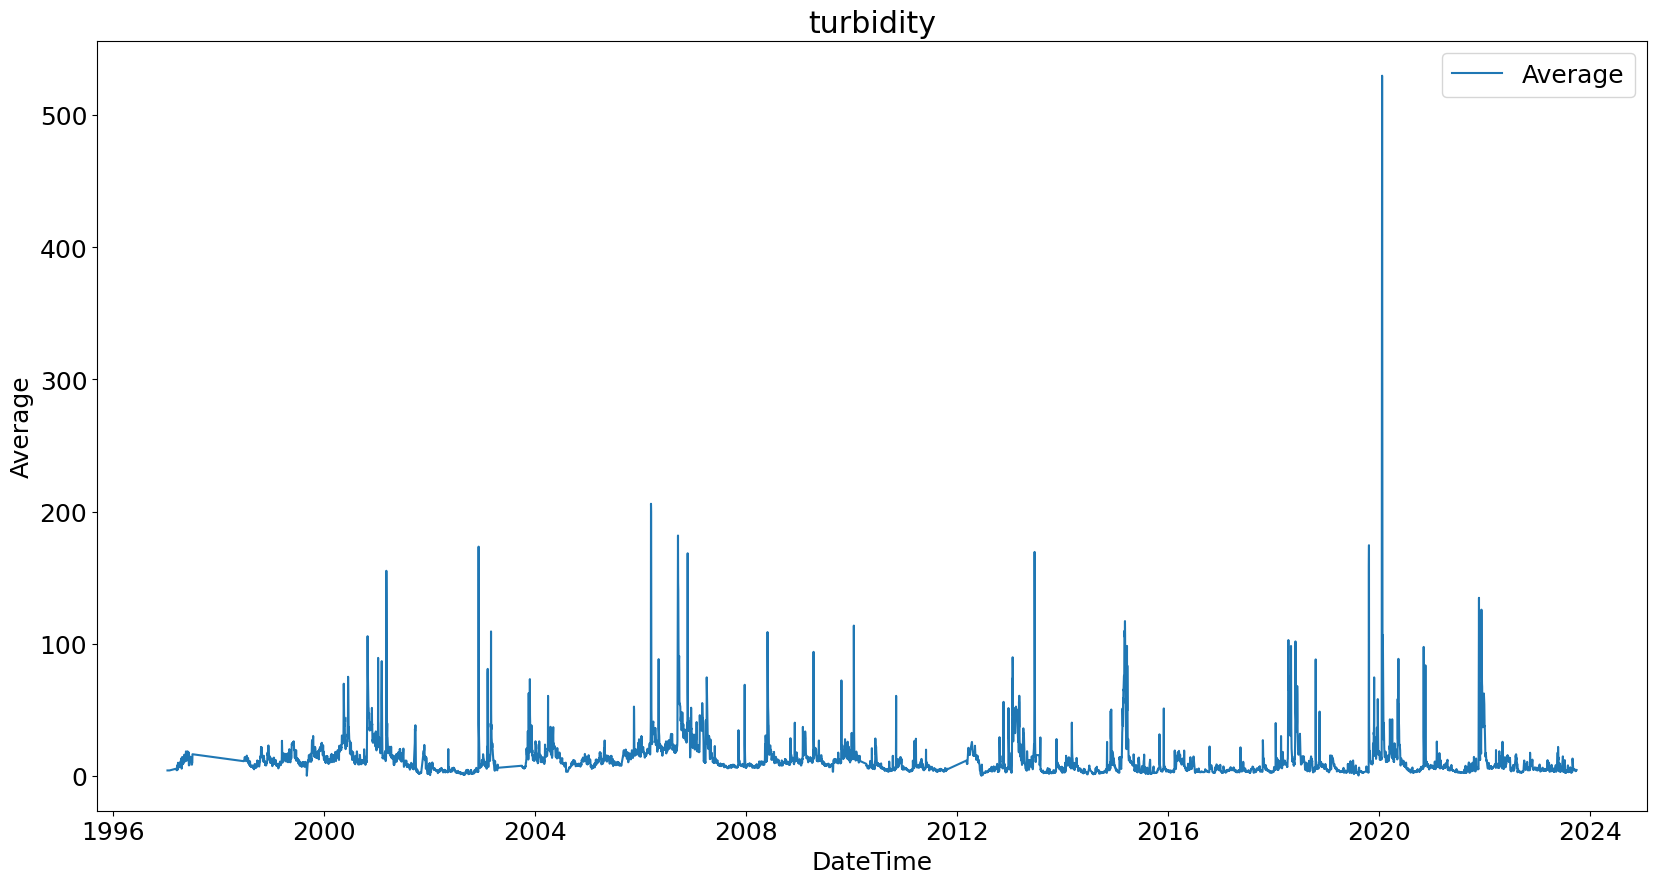

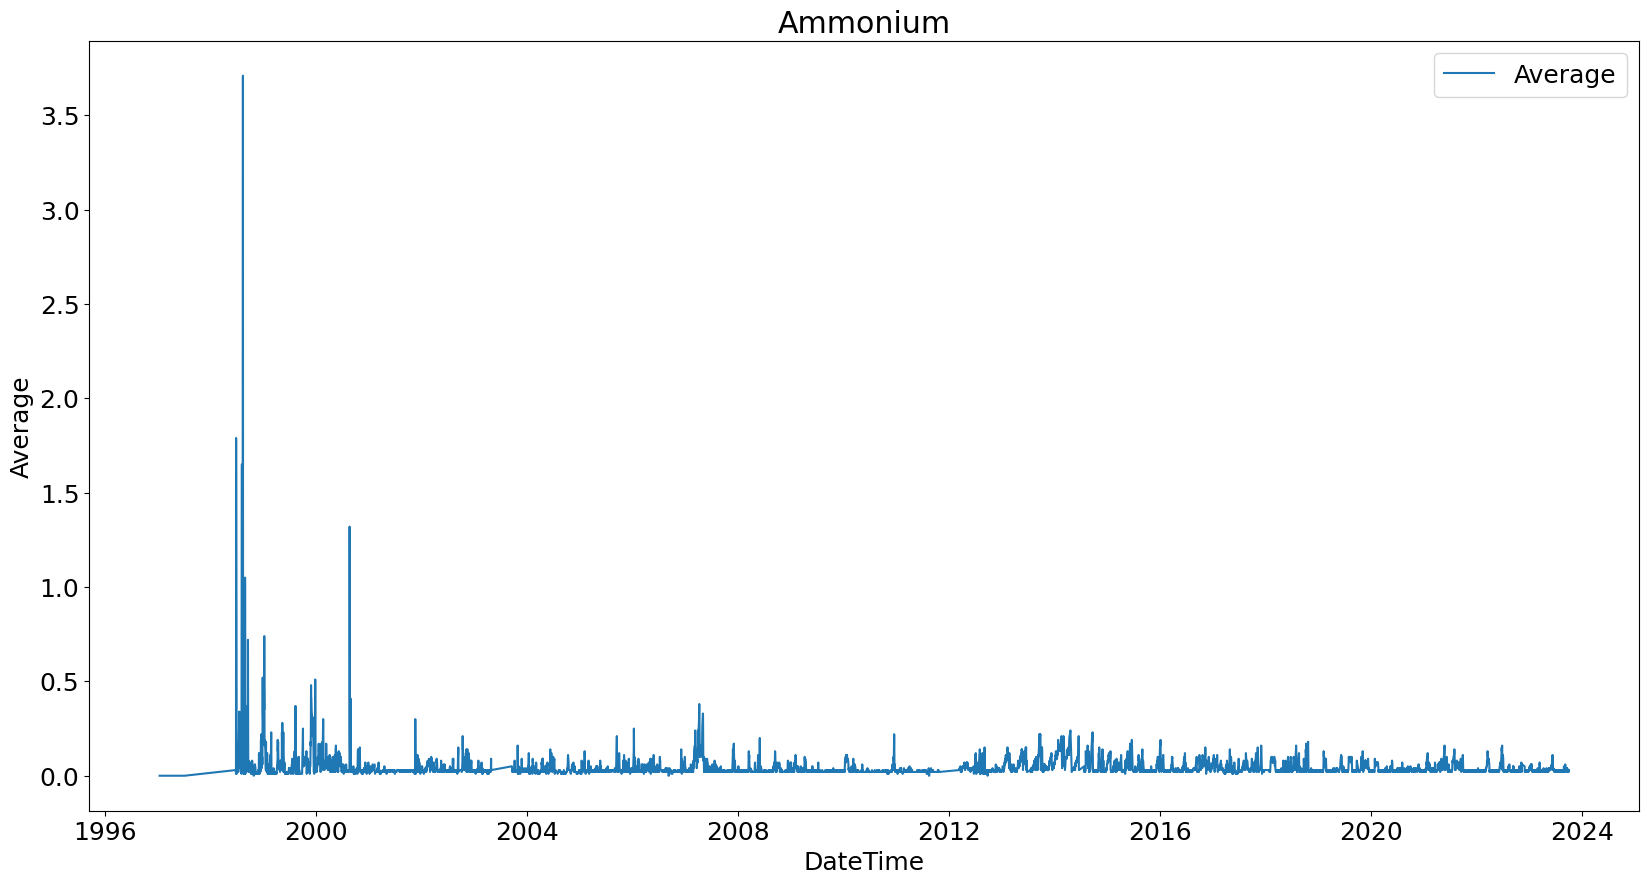

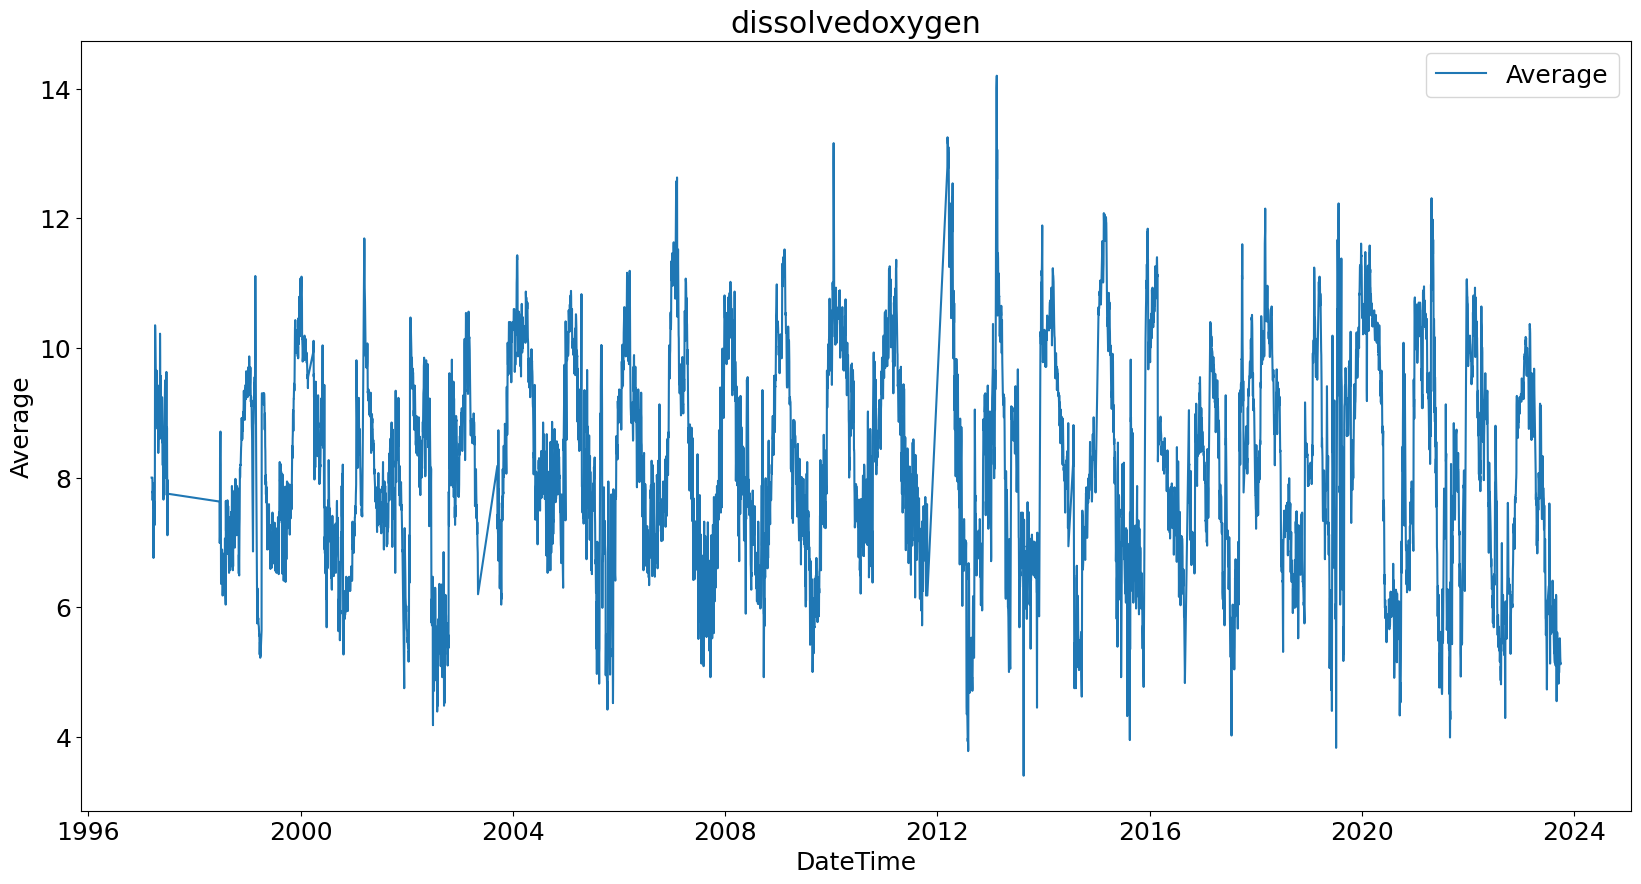

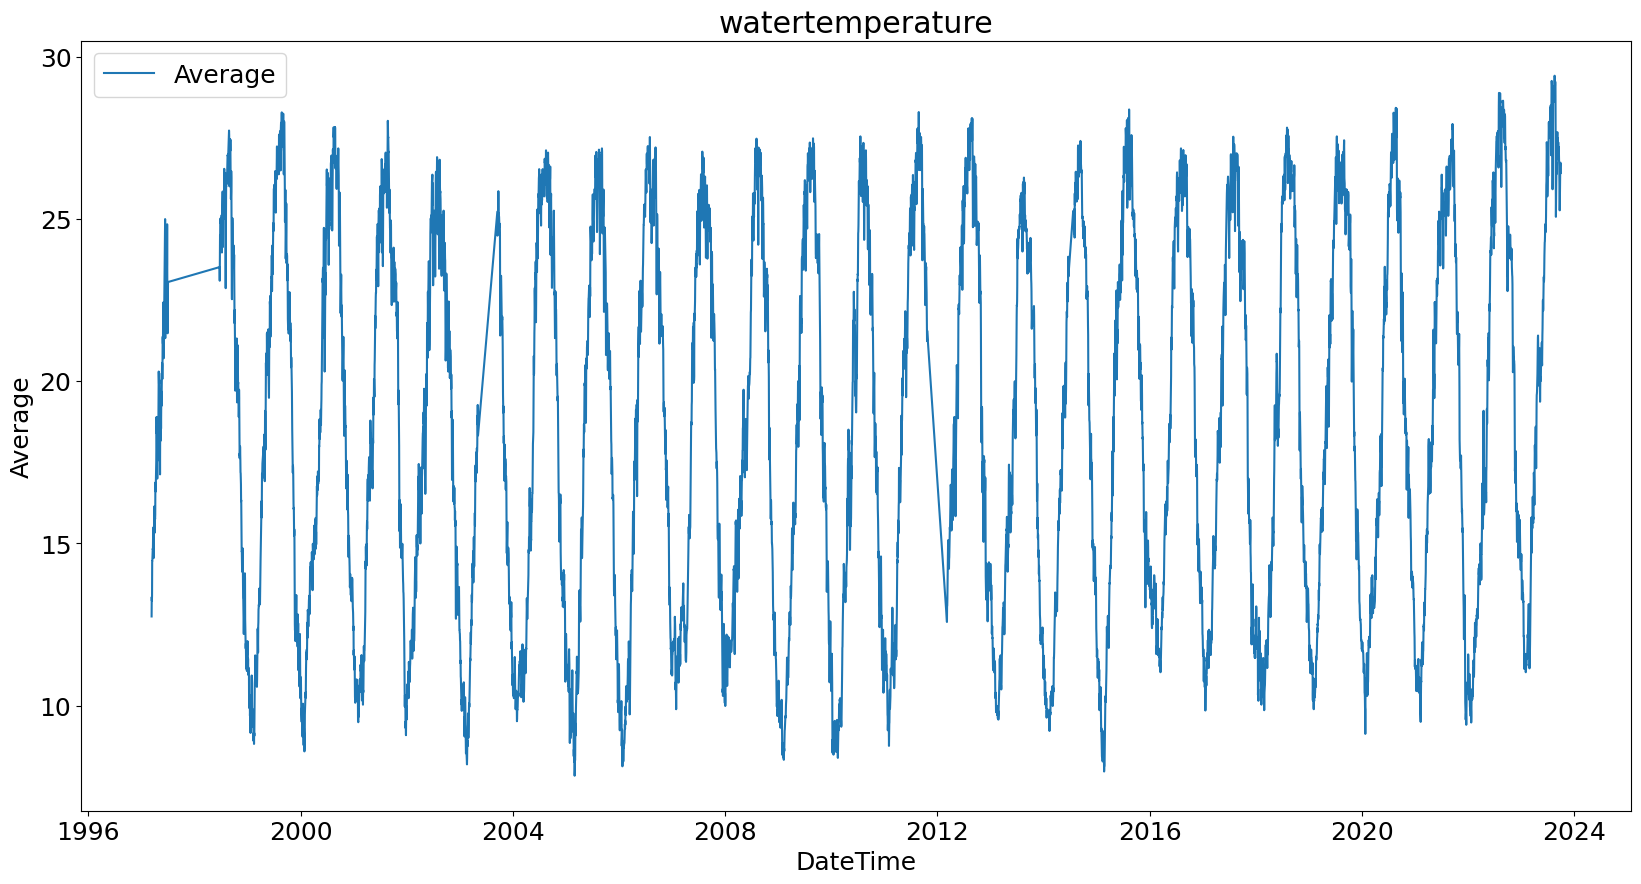

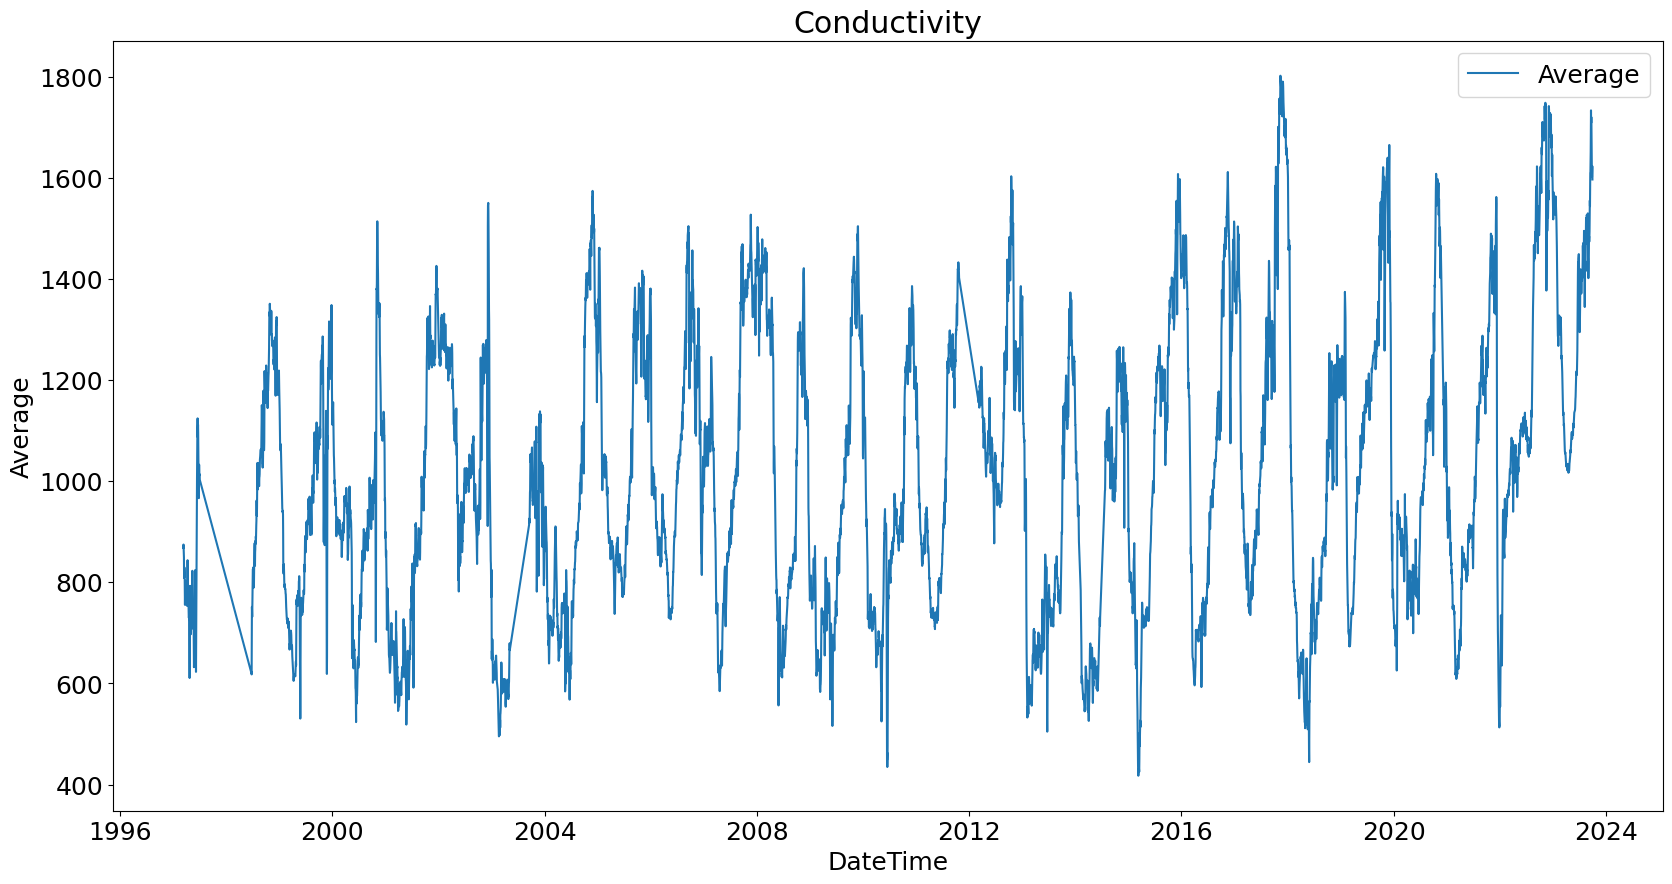

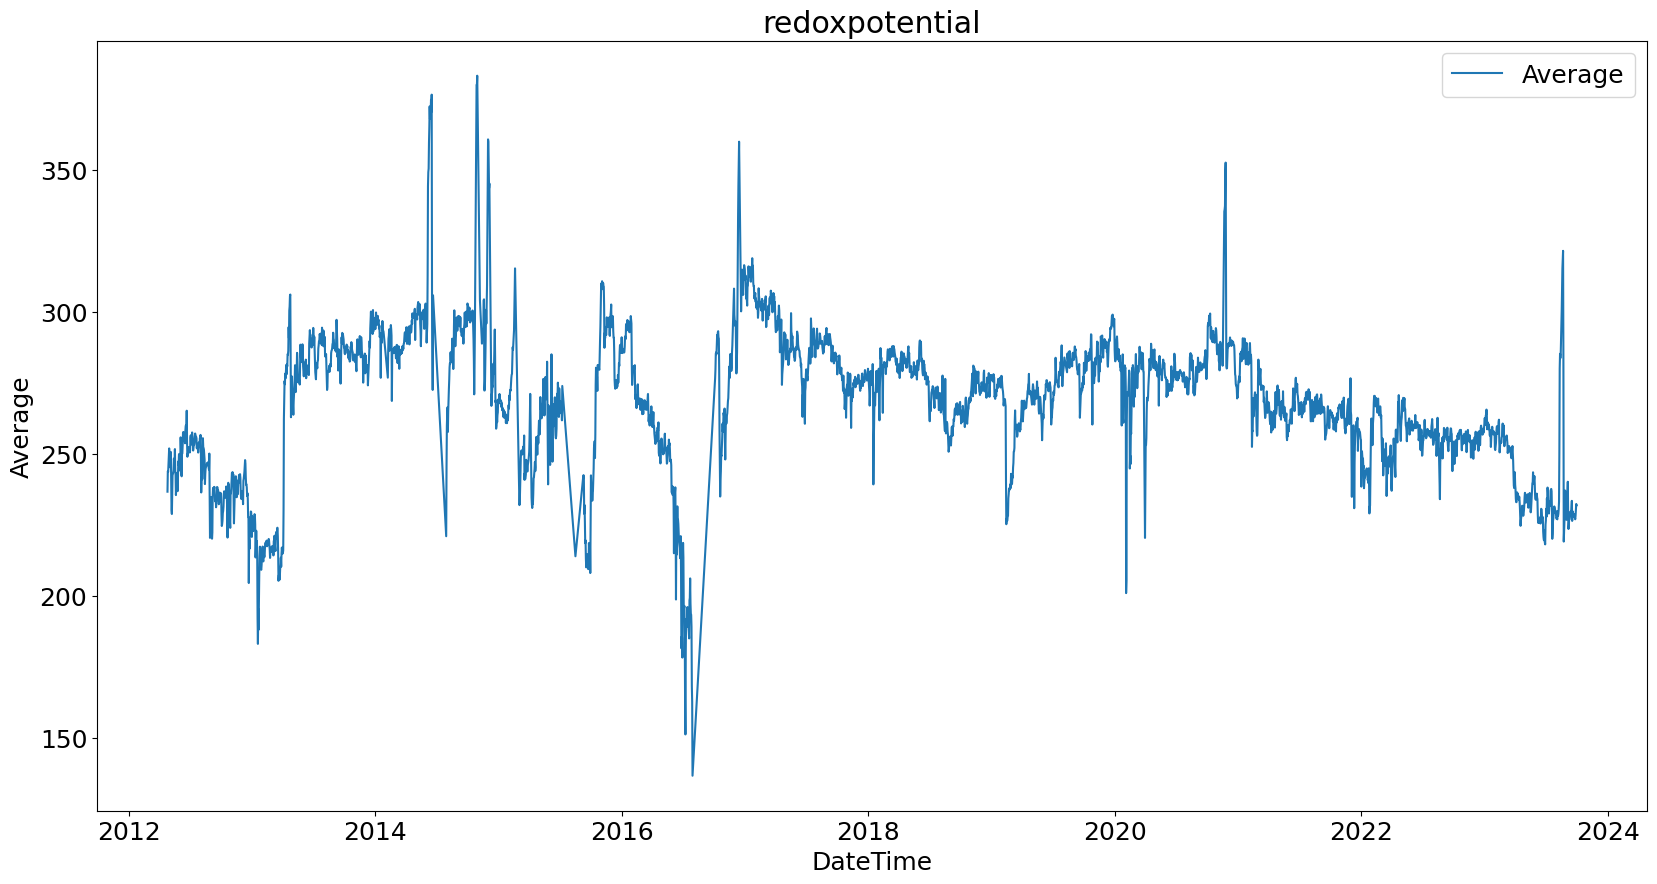

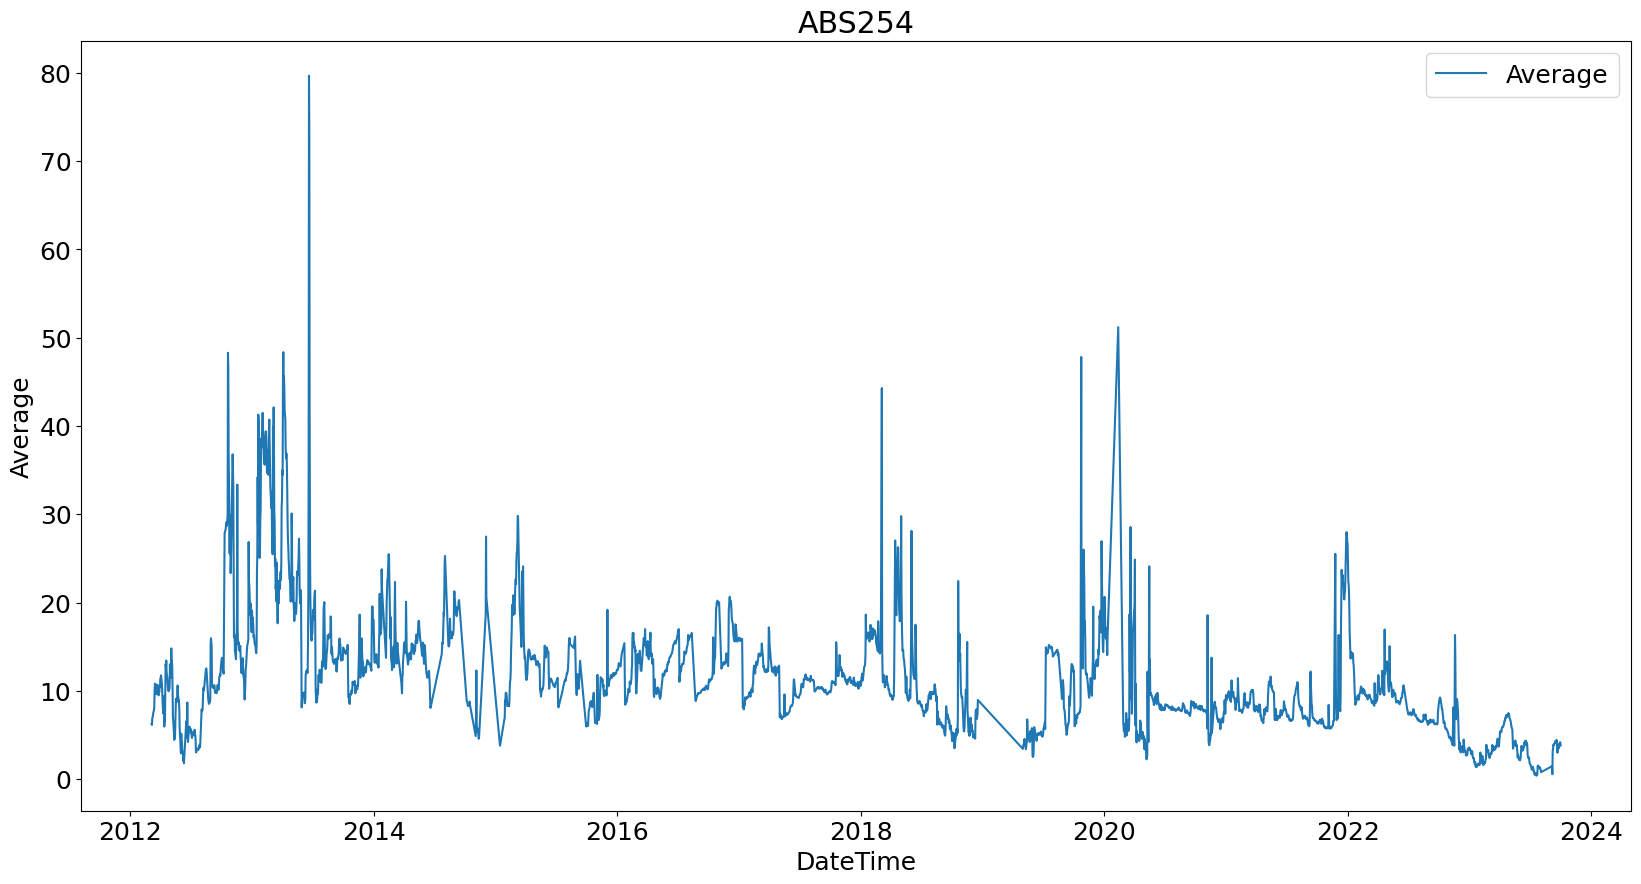

In [11]:
for feature, df in xerta_dfs.items():
    plt.figure(figsize=(20, 10))
    sns.scatterplot(data=df, x="DateTime", y="Average", label="Average")
    # if 'Maximum' in df.columns:
    #     sns.lineplot(data=df, x='DateTime', y='Maximum', label='Maximum')
    # if 'Minimum' in df.columns:
    #     sns.lineplot(data=df, x='DateTime', y='Minimum', label='Minimum')
    plt.title(feature)
    plt.legend()
    plt.show()

In [39]:
temp_df = xerta_dfs["watertemperature"]
abs_df = xerta_dfs["ABS254"]

# Time Series Decomposition

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

## Tortosa

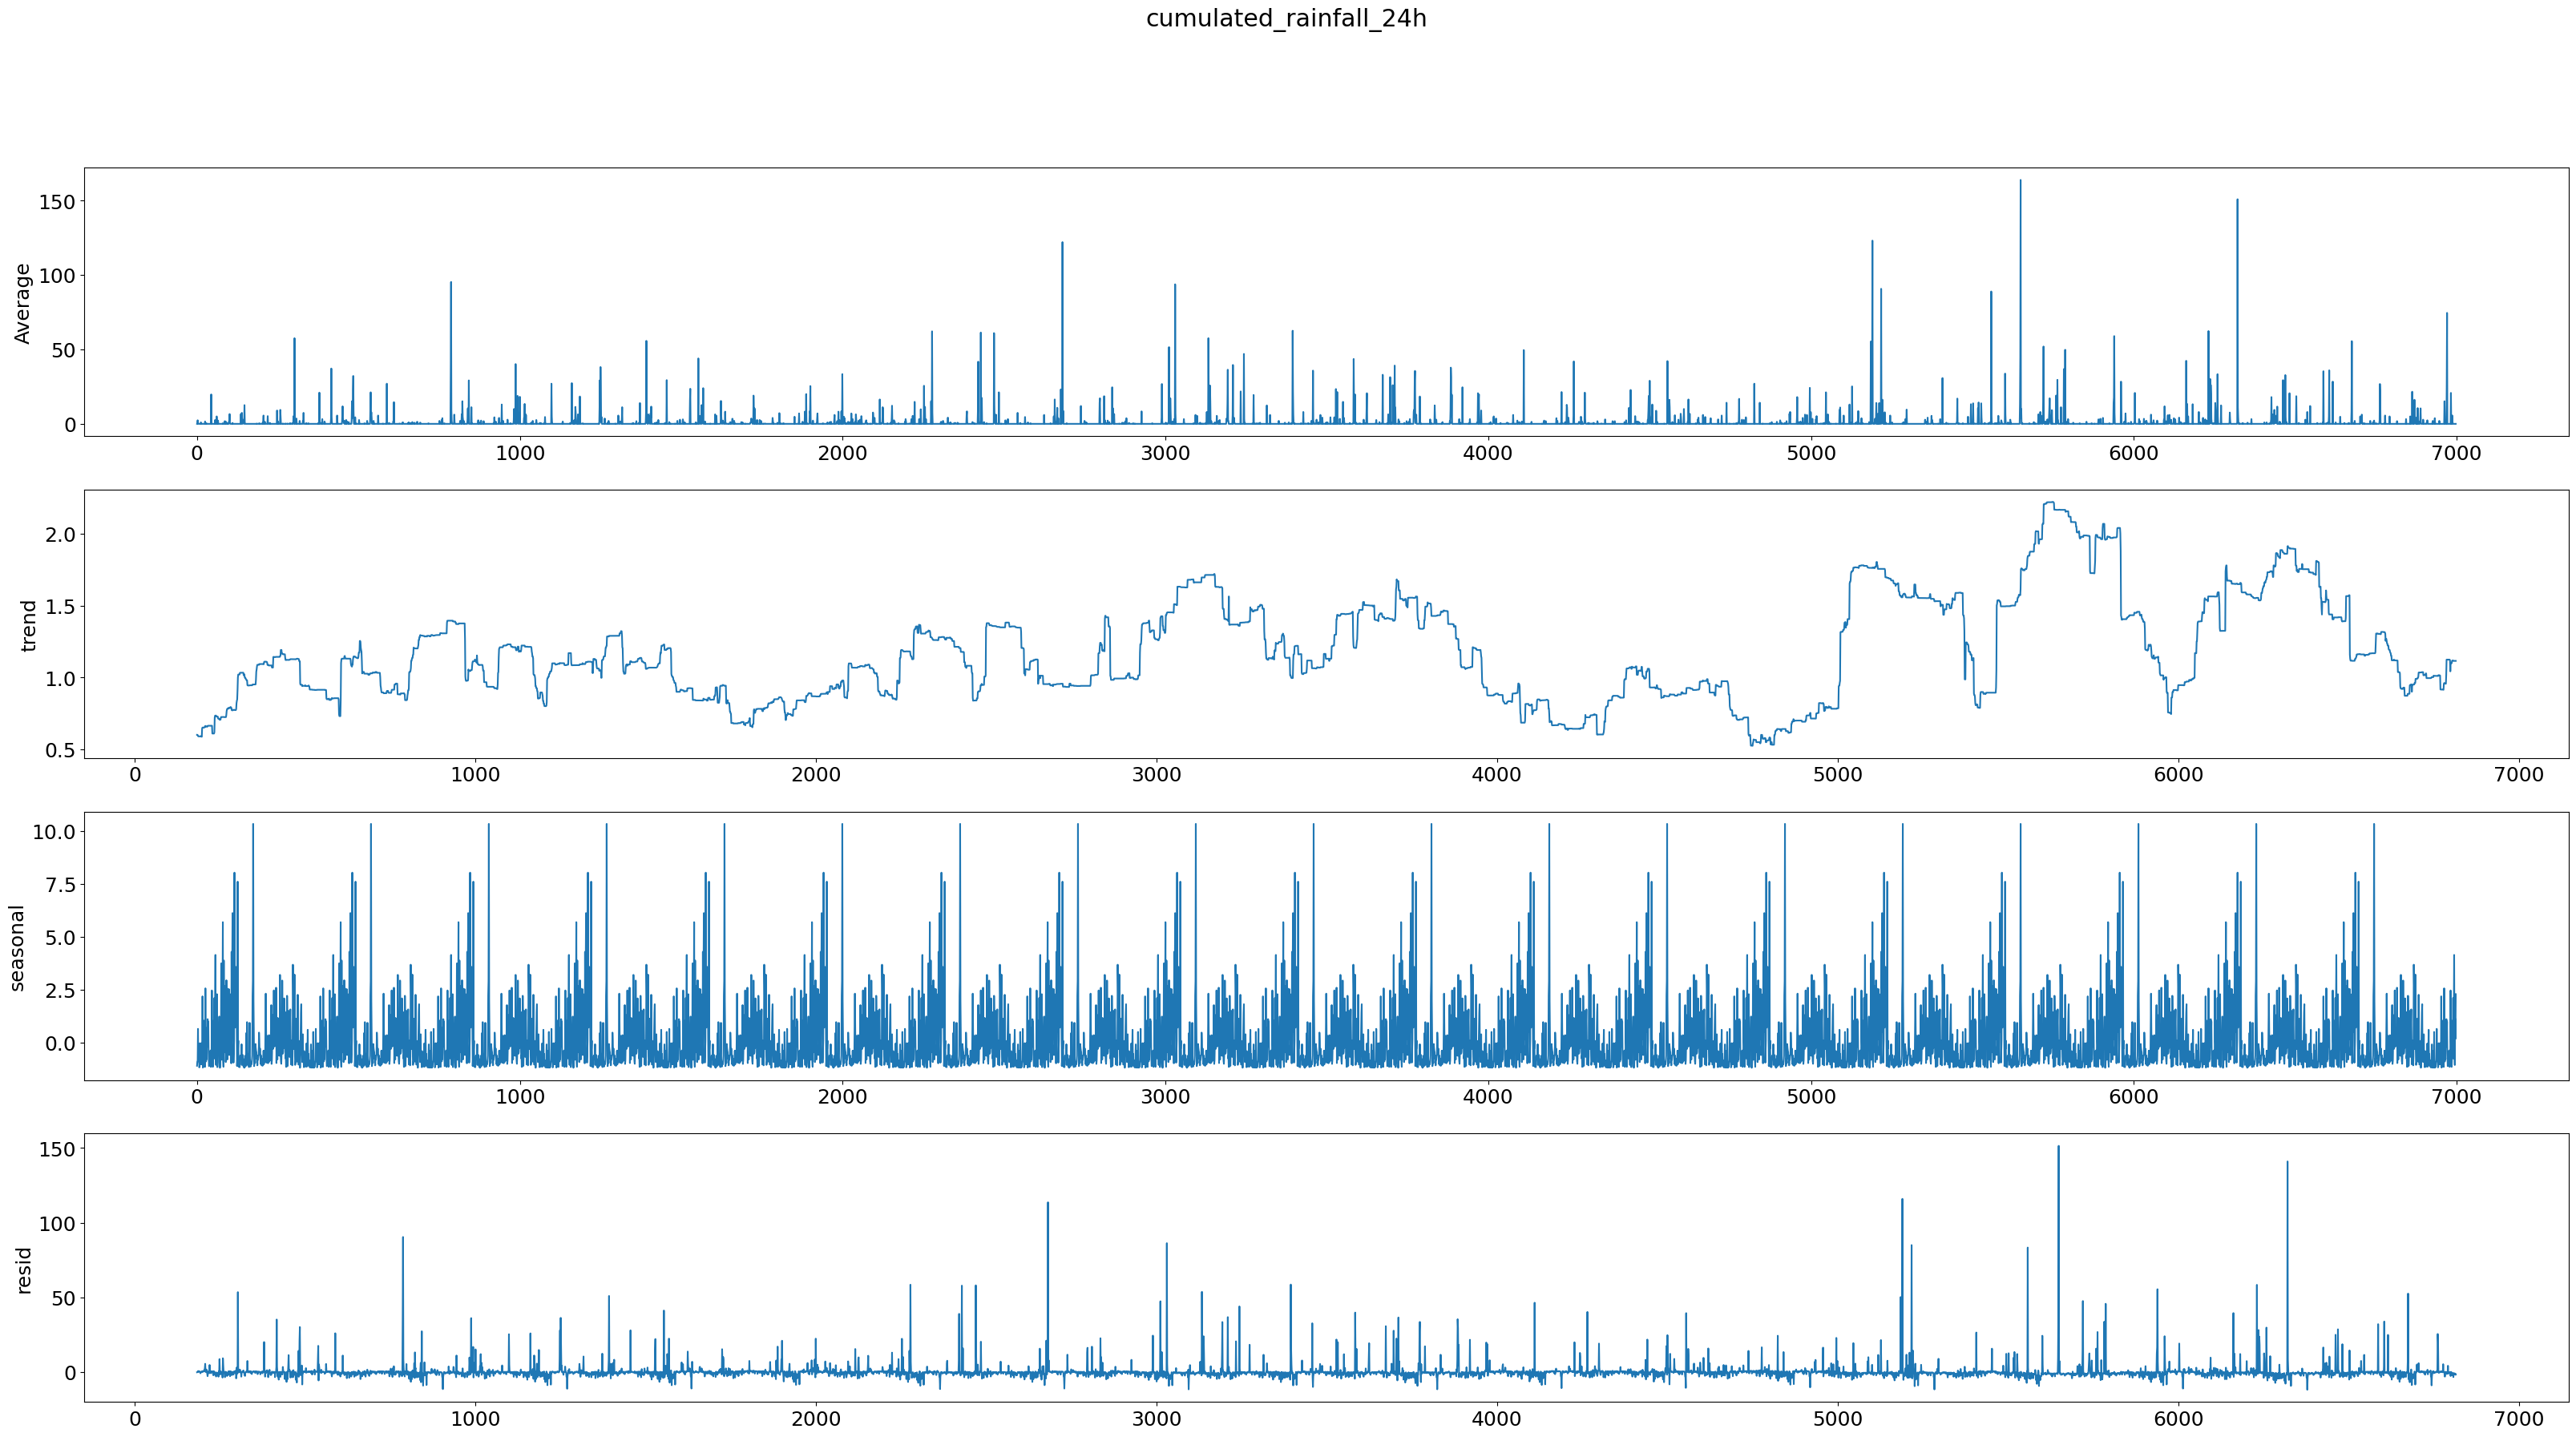

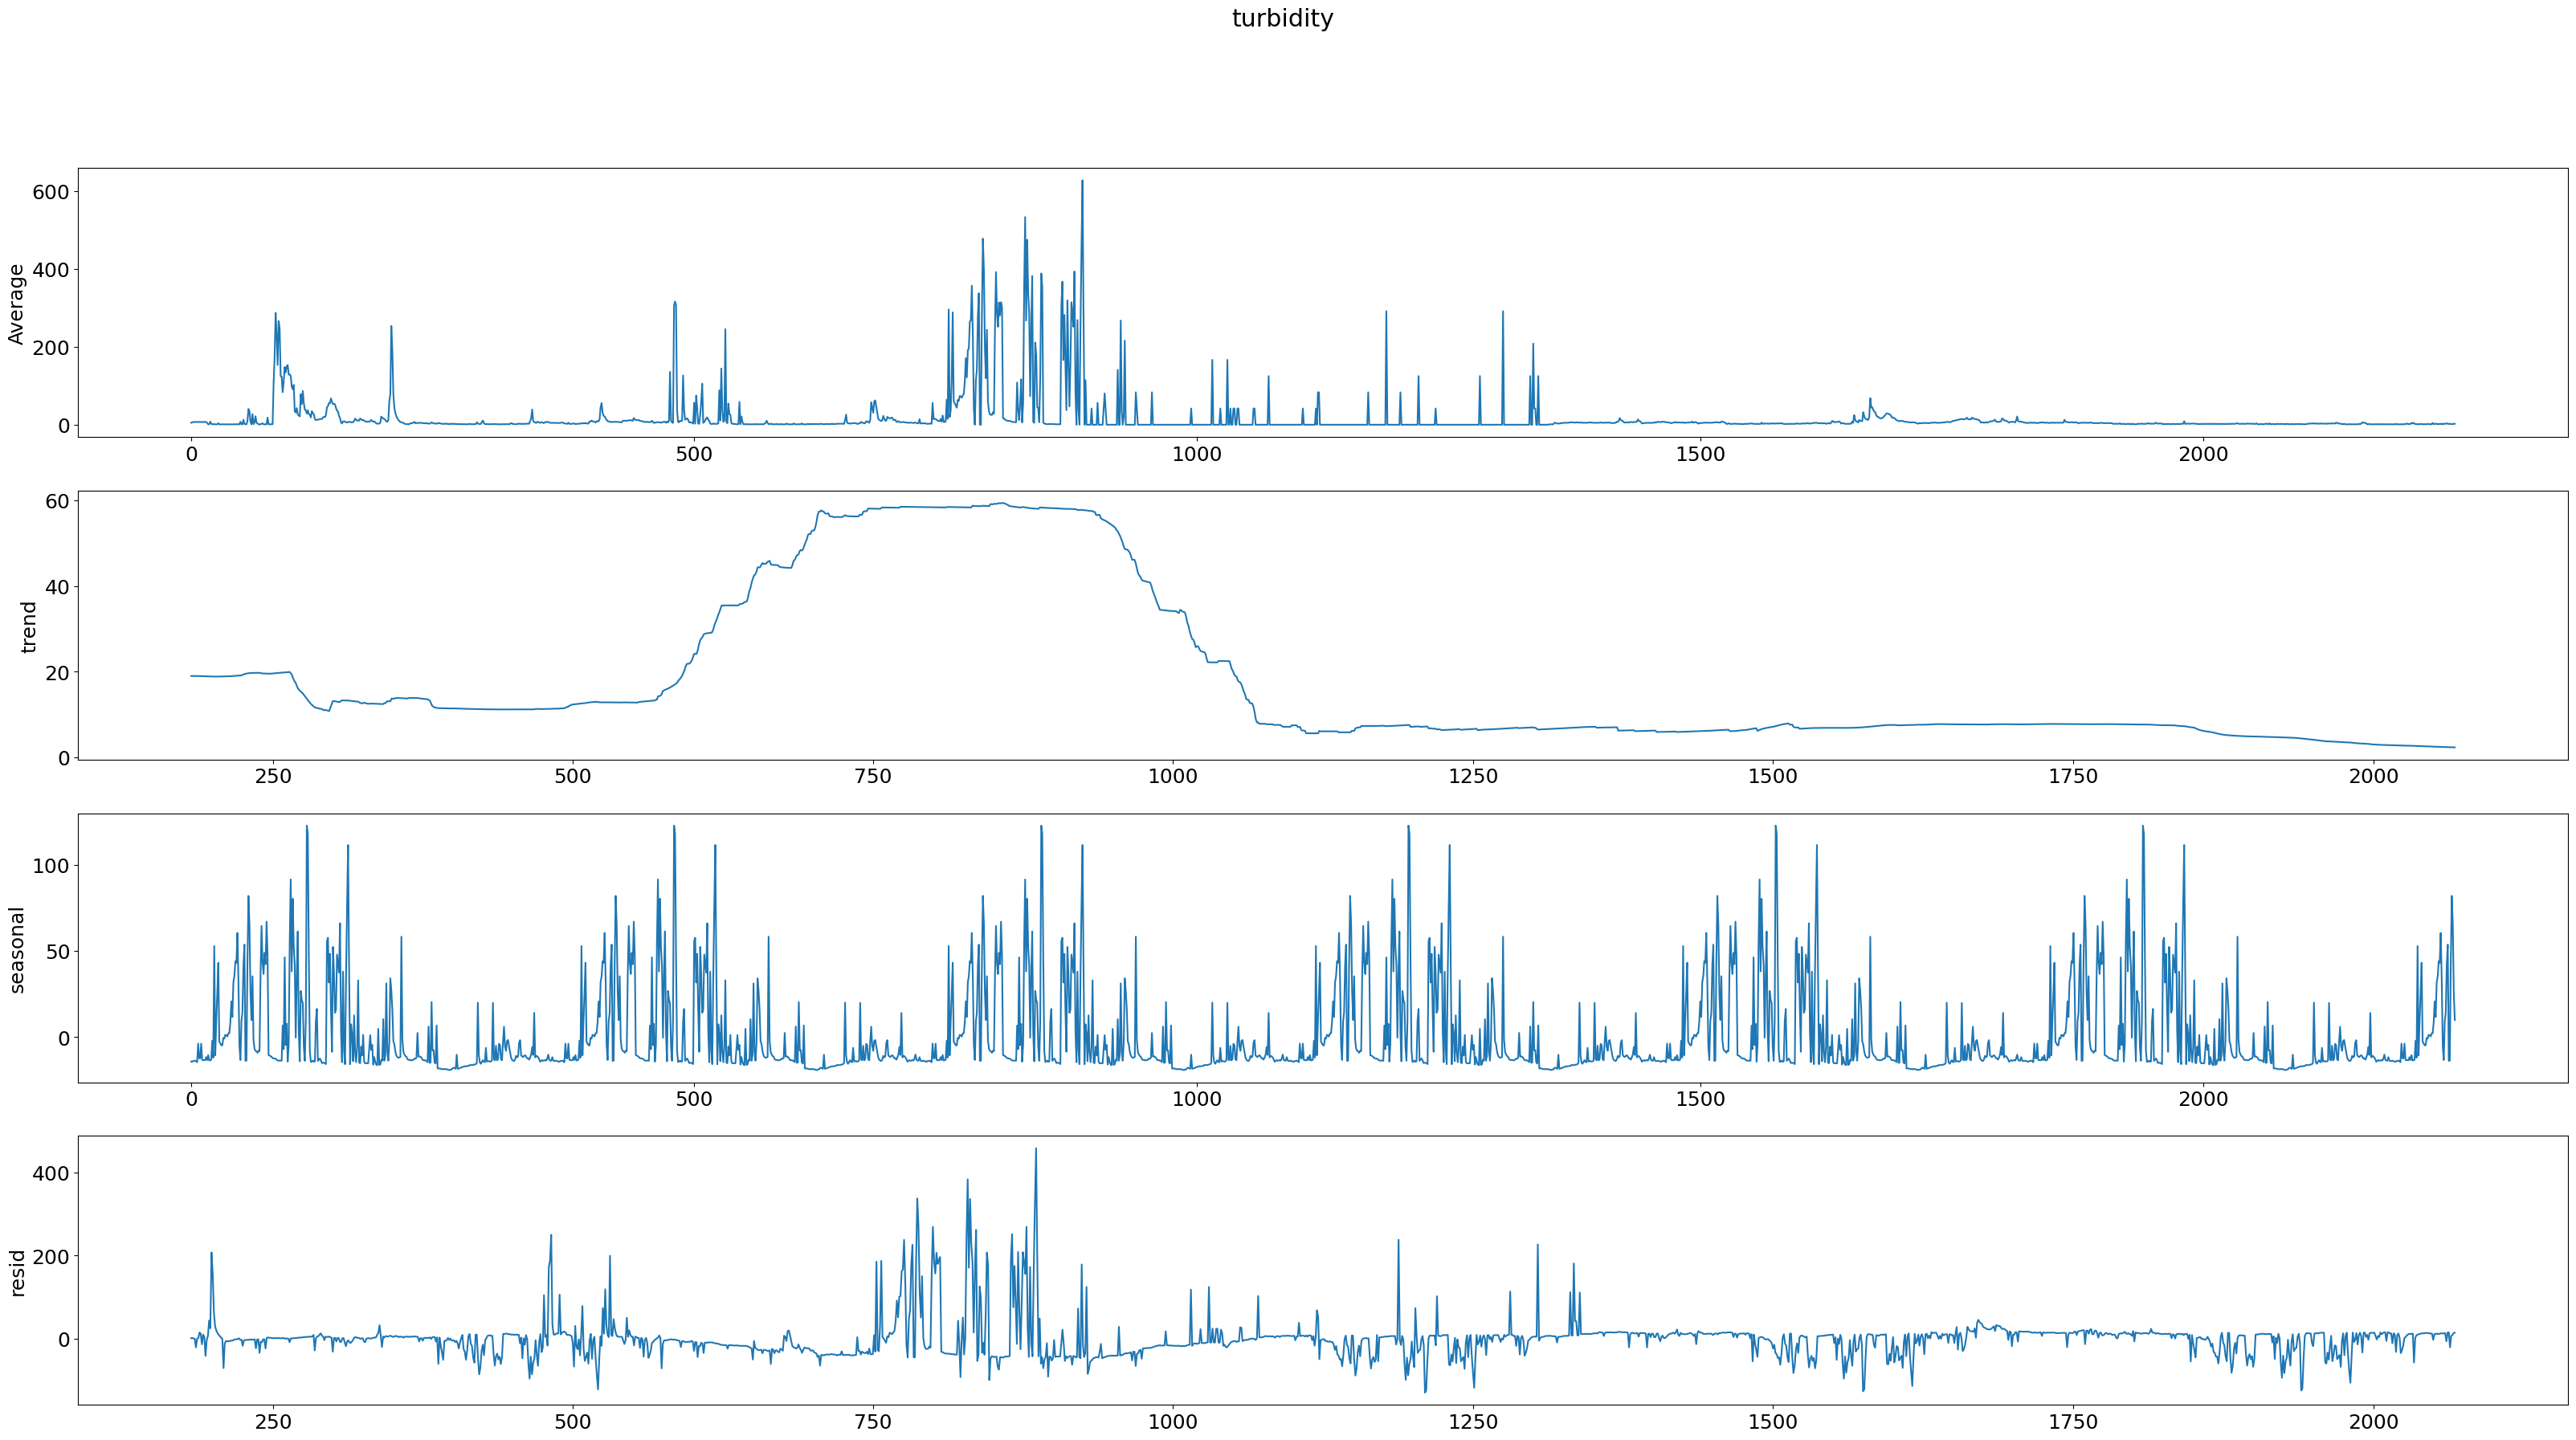

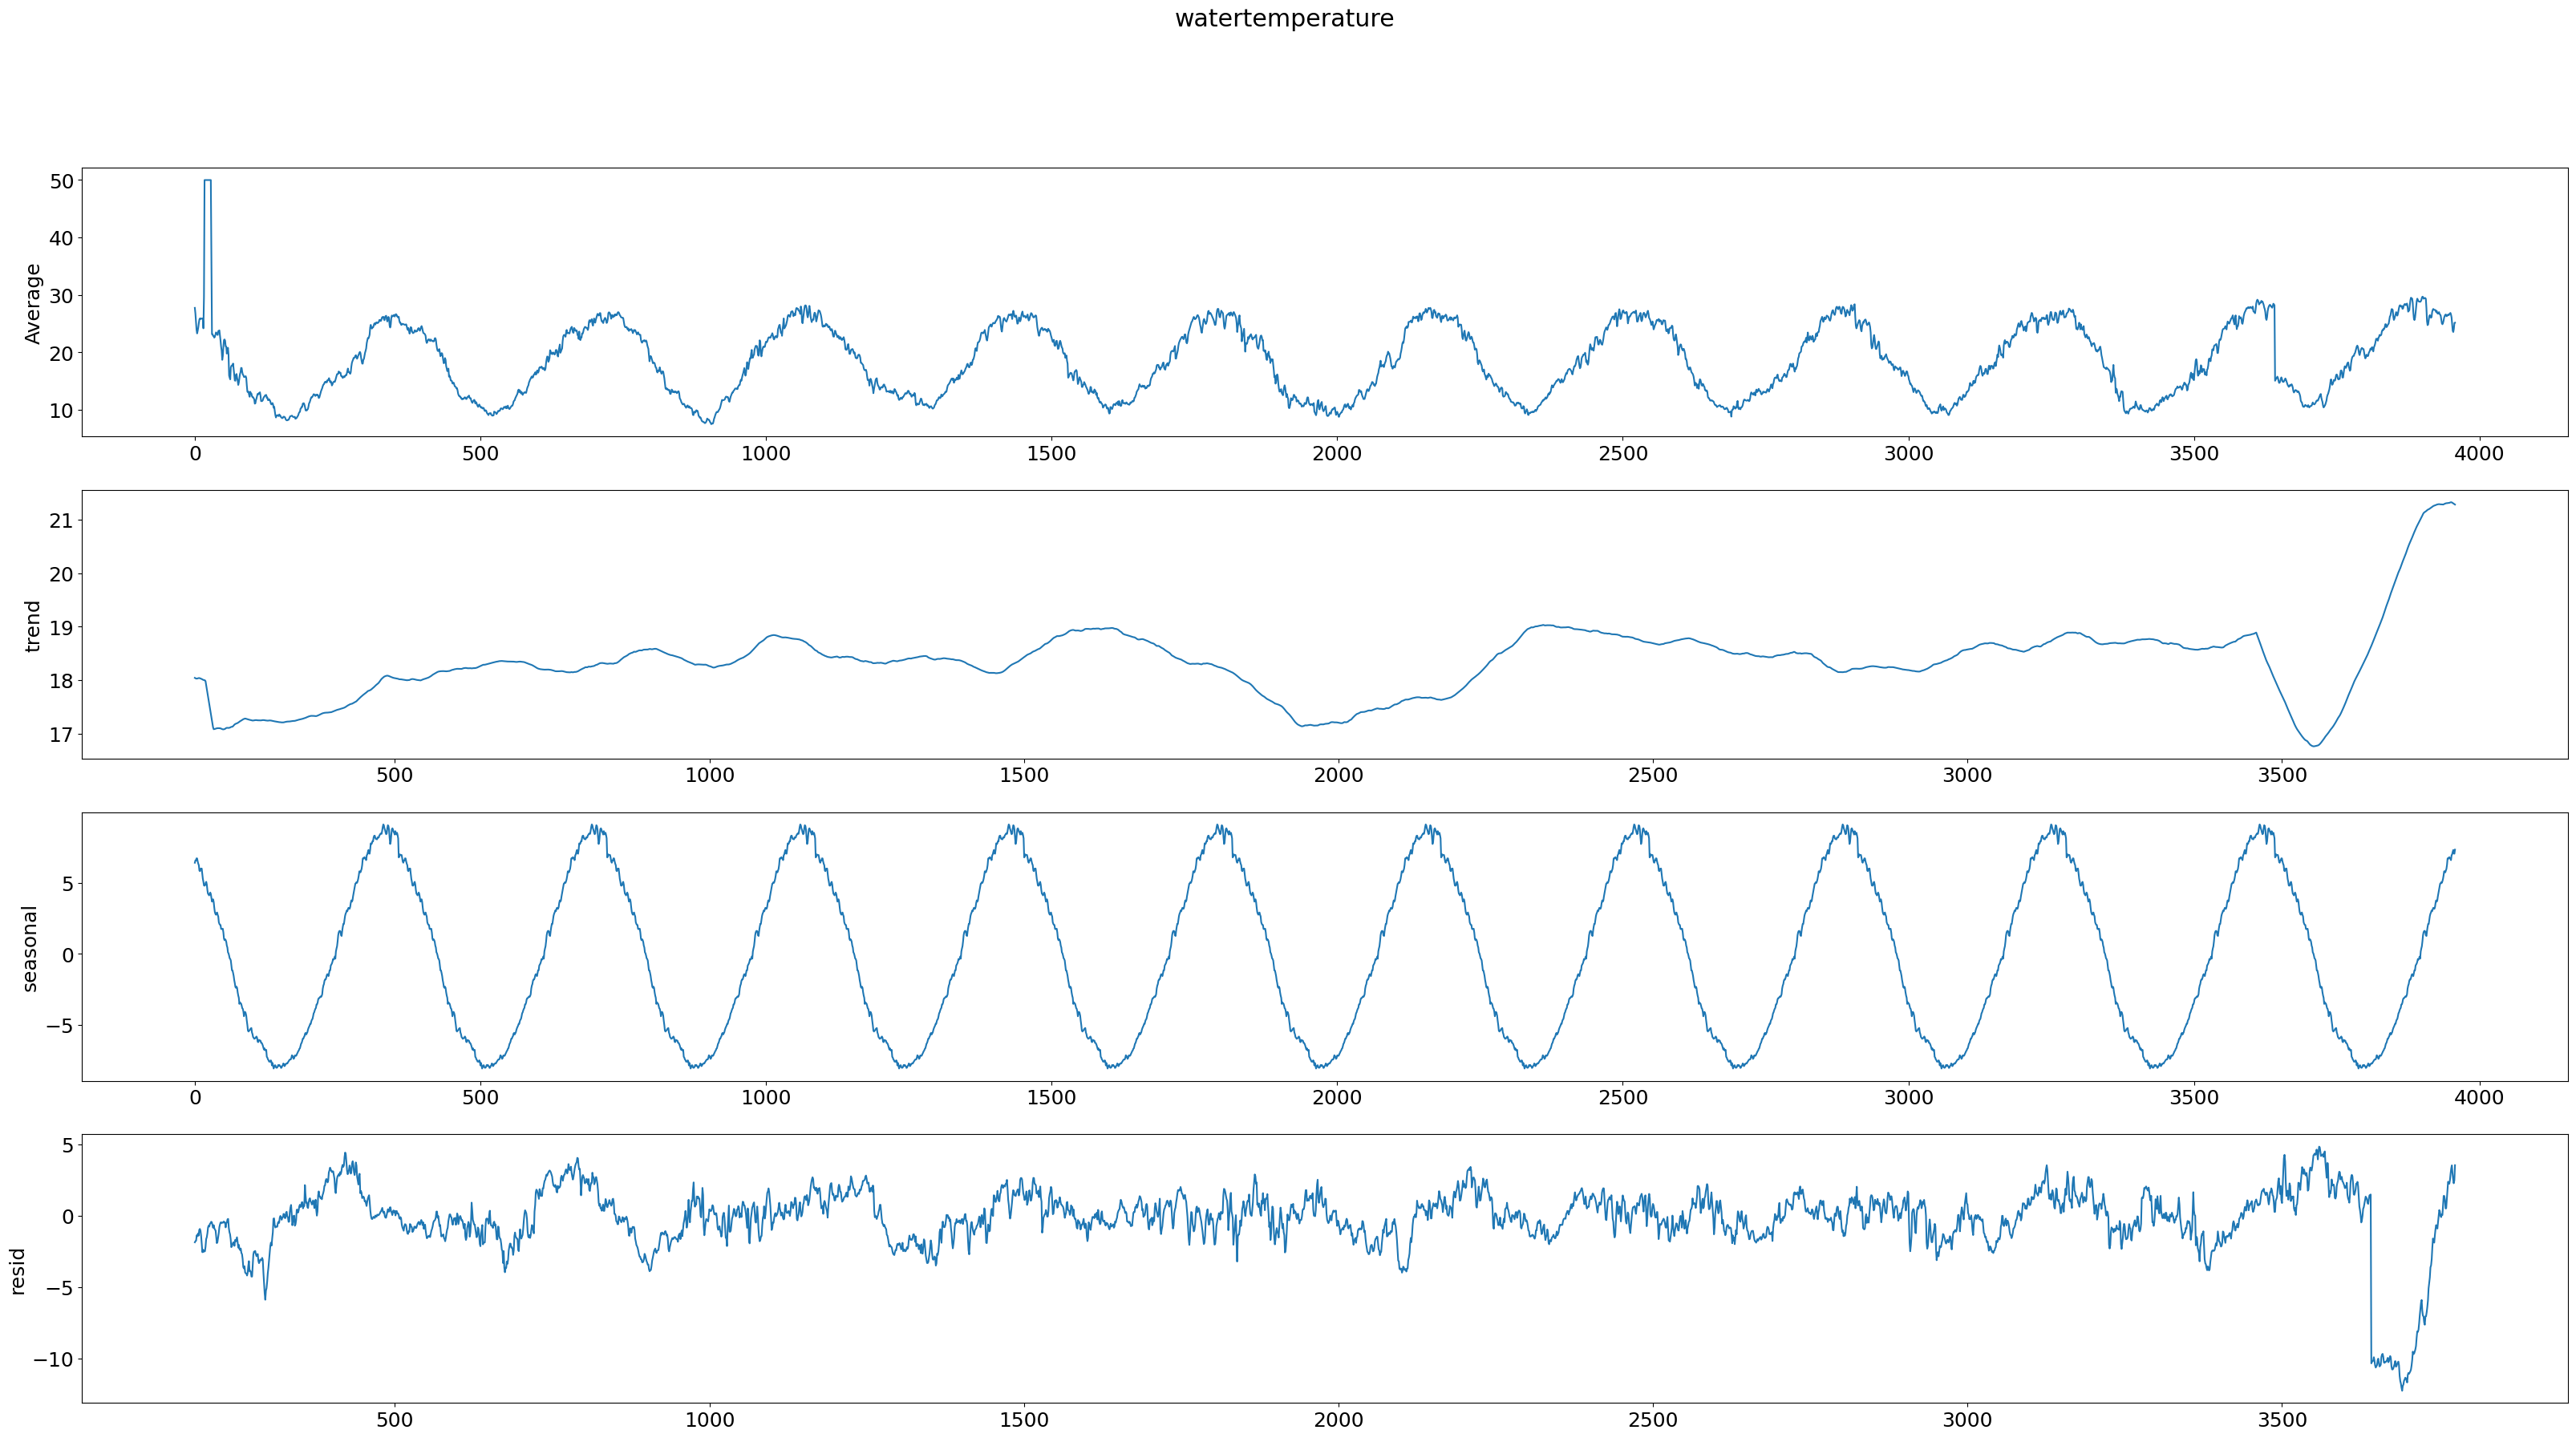

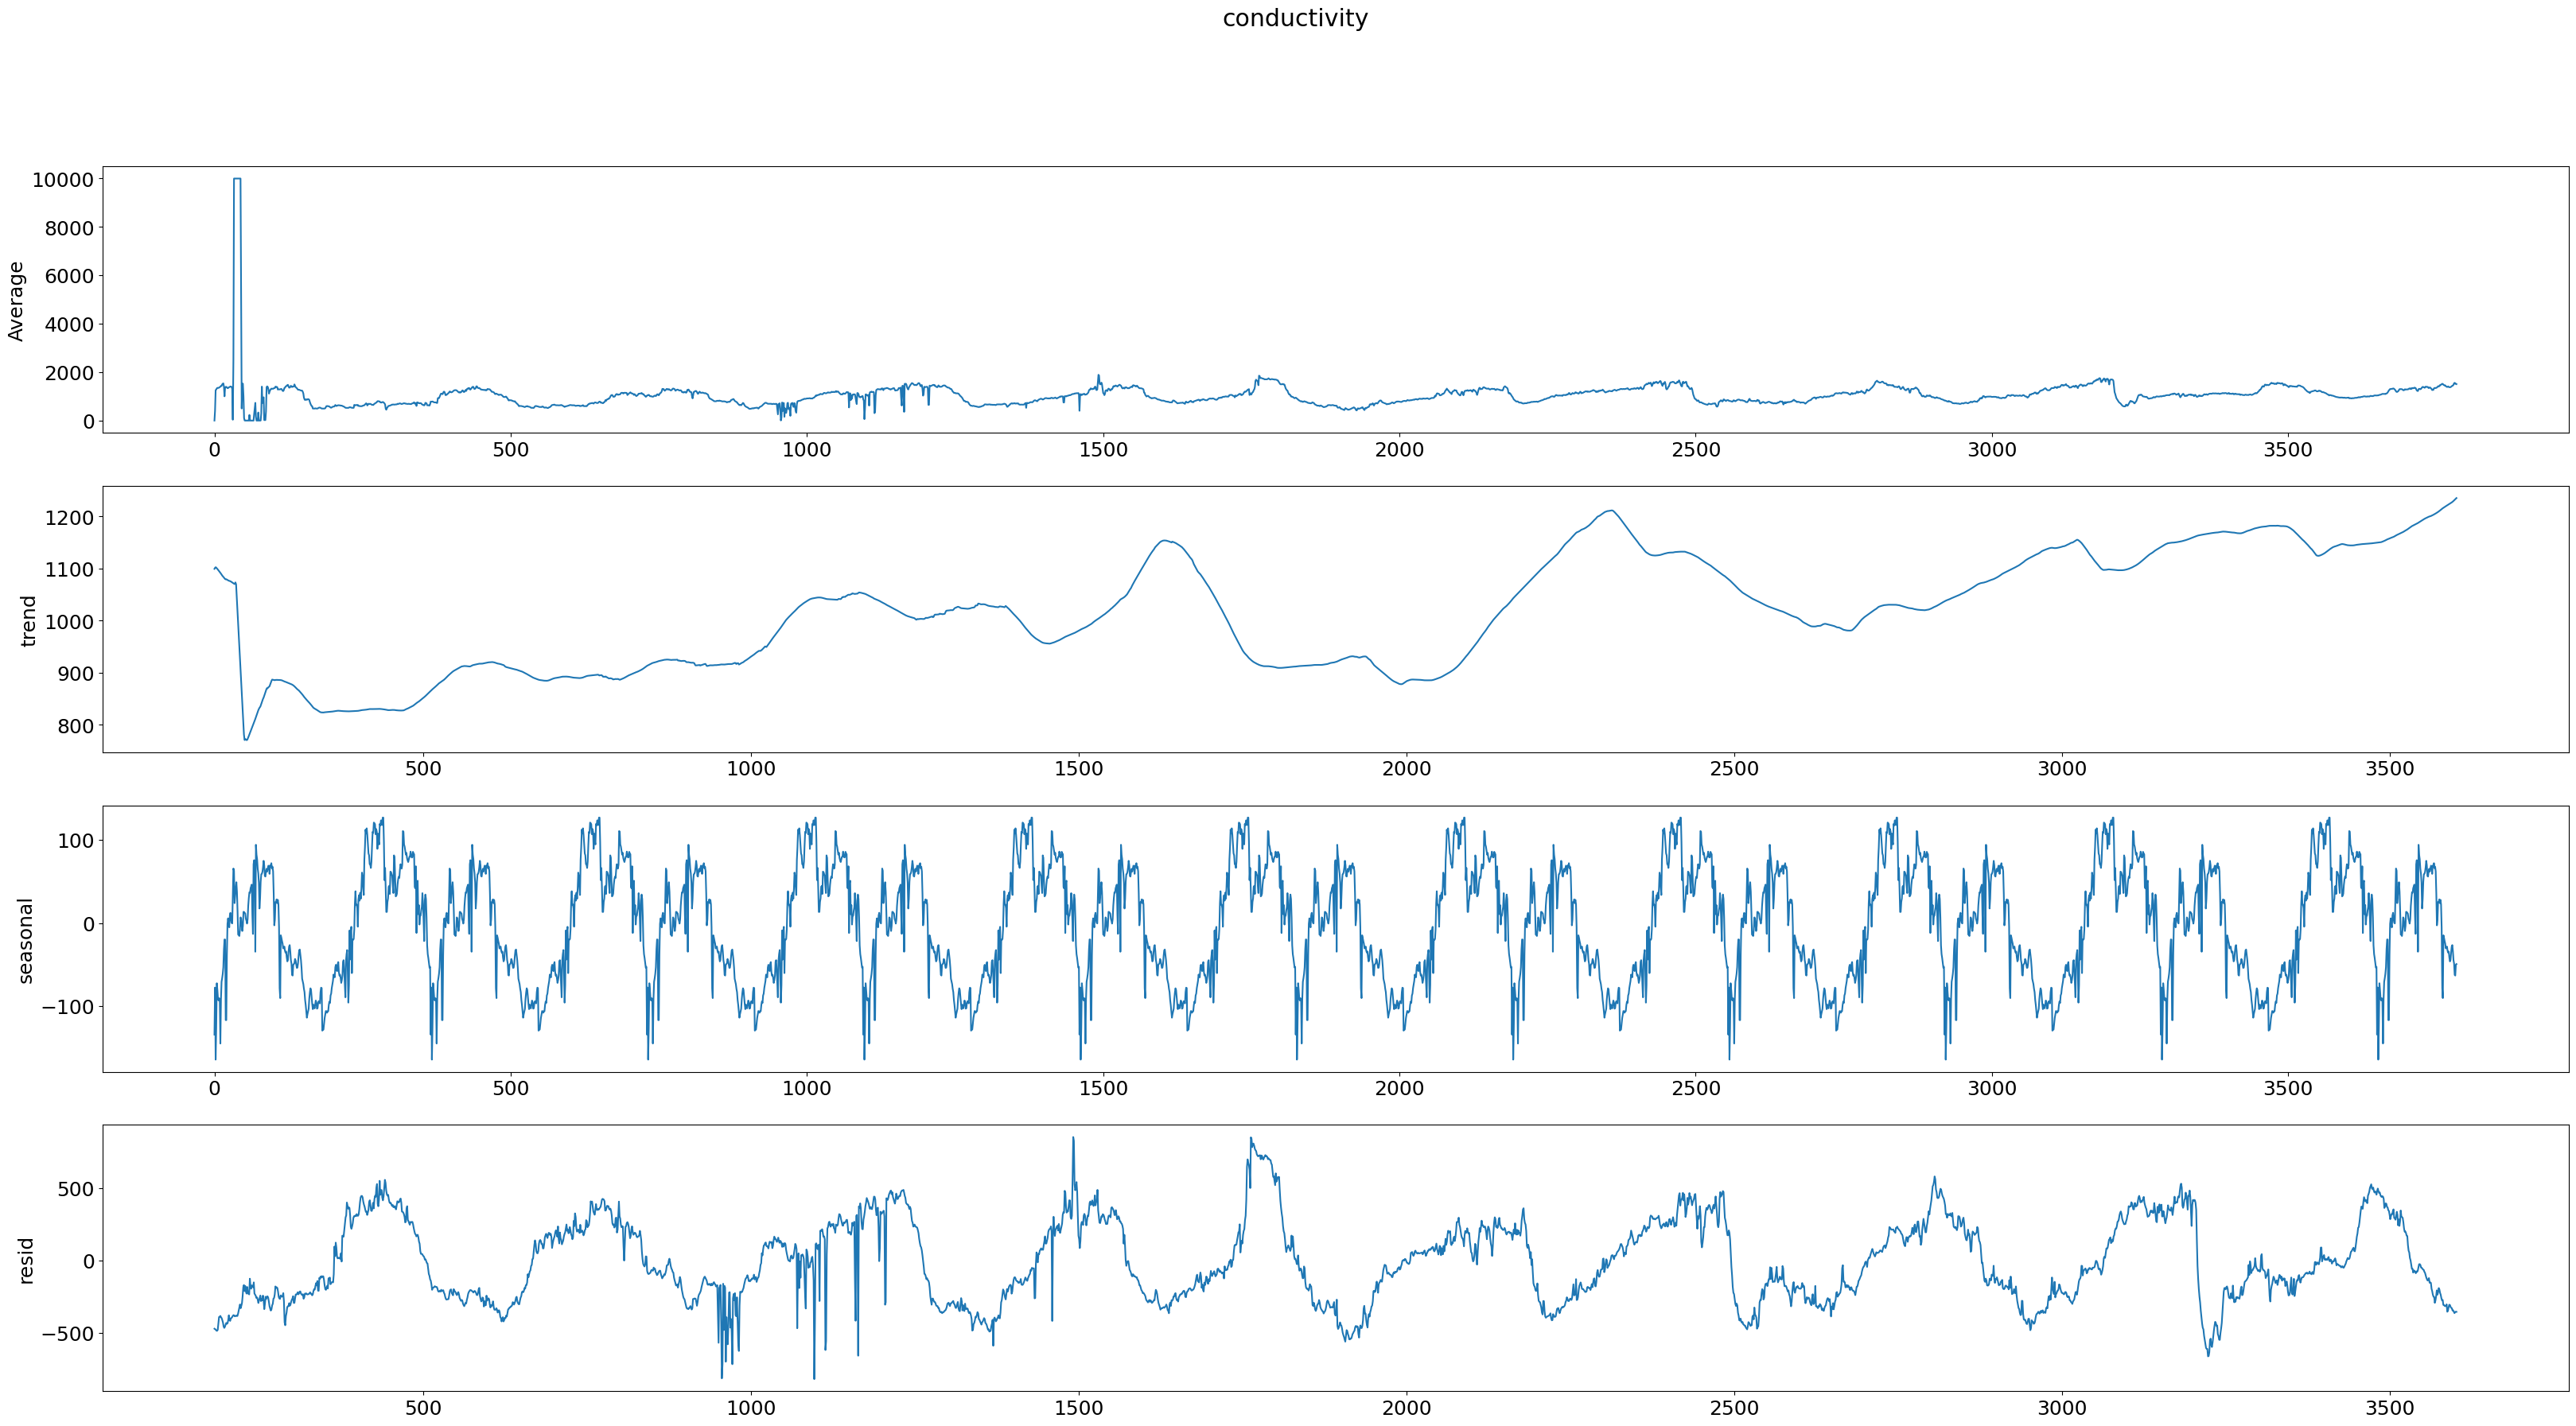

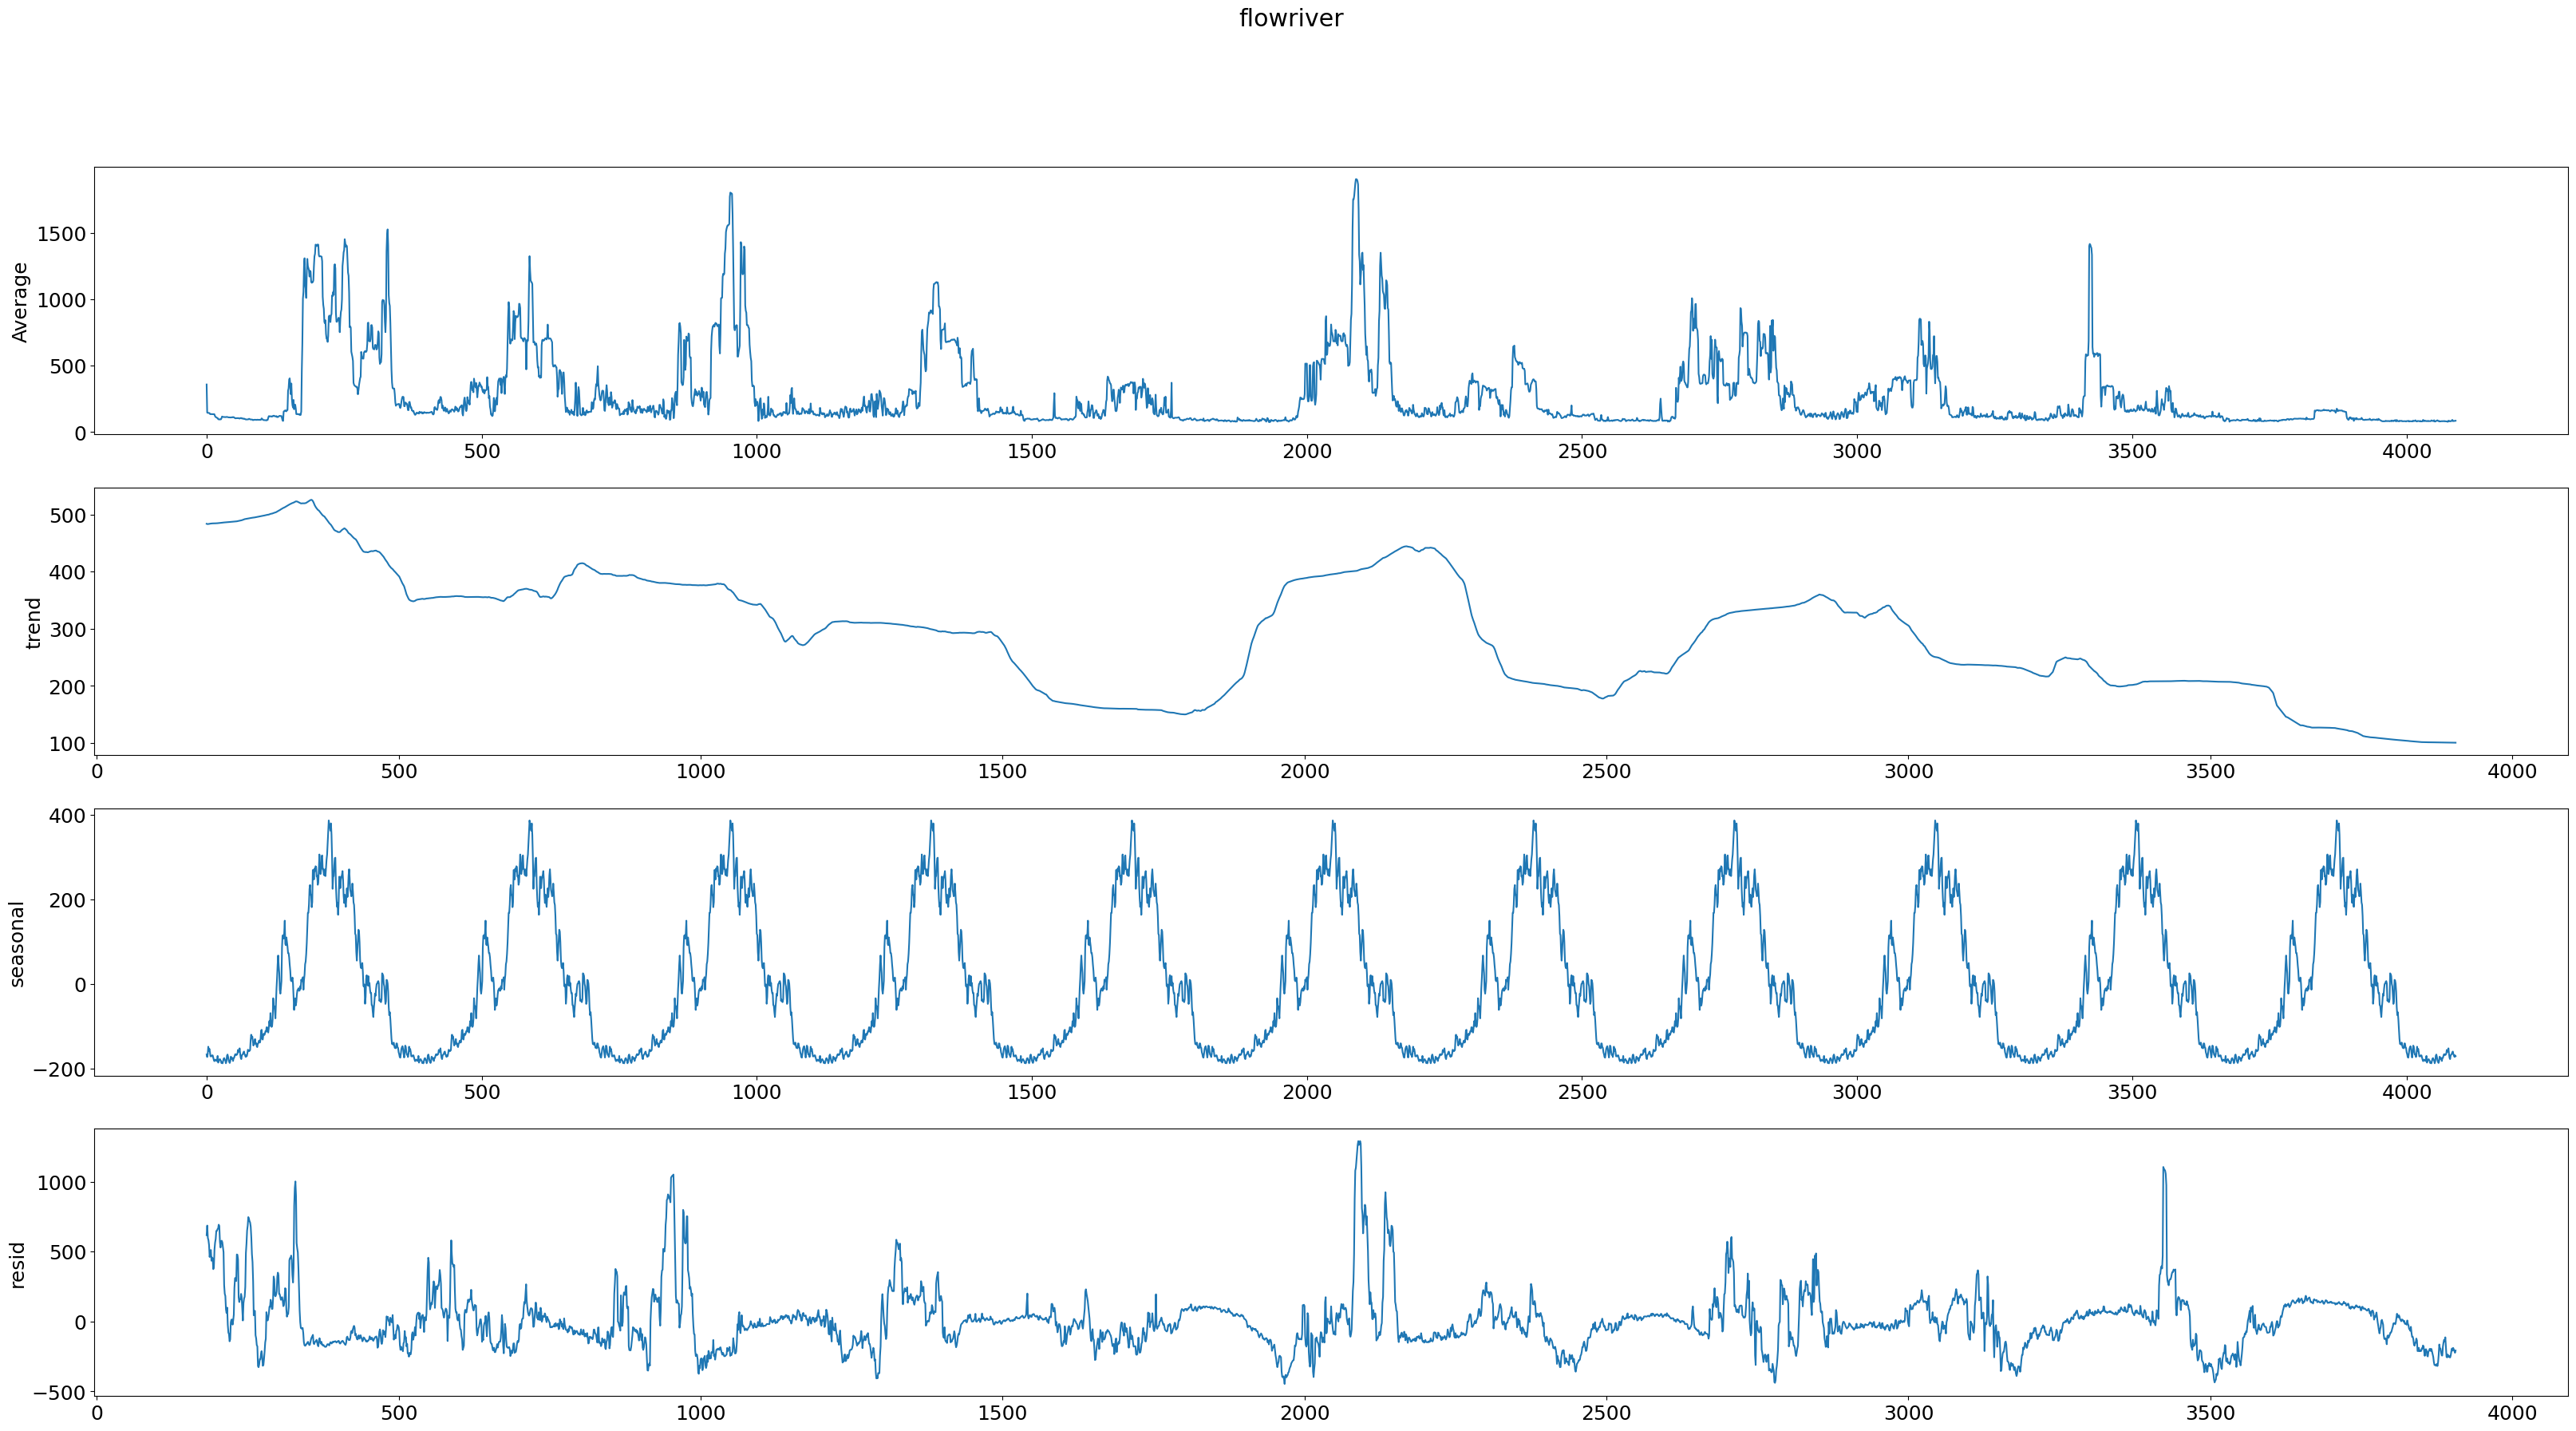

In [13]:
for feature, df in tortosa_dfs.items():
    result = seasonal_decompose(df["Average"], model="additive", period=365)
    fig, axs = plt.subplots(4, 1, figsize=(40, 20))
    sns.lineplot(data=result.observed, ax=axs[0])
    sns.lineplot(data=result.trend, ax=axs[1])
    sns.lineplot(data=result.seasonal, ax=axs[2])
    sns.lineplot(data=result.resid, ax=axs[3])
    fig.suptitle(feature)
    plt.show()